## **Báo cáo giai đoạn 3**

## **Nhóm `CHNT`**: 
  + Nguyễn Văn Hùng	- 1712222
  + Huỳnh Trí Cơ - 1712303
  + Nguyễn Thị Tuyết - 1712893
  + Nguyễn Đình Hoàng Nguyên - 19120606

In [1]:
!wget https://raw.githubusercontent.com/HoangNguyen31/Final-Project-Applied-Data-Science/main/data/train.csv
!wget https://raw.githubusercontent.com/HoangNguyen31/Final-Project-Applied-Data-Science/main/data/test.csv
!wget https://raw.githubusercontent.com/HoangNguyen31/Final-Project-Applied-Data-Science/main/data/sample_submission.csv

--2023-05-24 14:20:11--  https://raw.githubusercontent.com/HoangNguyen31/Final-Project-Applied-Data-Science/main/data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28308747 (27M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  27.00M   155MB/s    in 0.2s    

2023-05-24 14:20:11 (155 MB/s) - ‘train.csv’ saved [28308747/28308747]

--2023-05-24 14:20:12--  https://raw.githubusercontent.com/HoangNguyen31/Final-Project-Applied-Data-Science/main/data/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting respons

In [2]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.4 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ast
from collections import Counter
from wordcloud import WordCloud


from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
import time
from datetime import datetime

import warnings 
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("train.csv", encoding='utf-8')
df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


## **Giai đoạn 2**:

### **2.1. Chuẩn bị dữ liệu**

#### 2.1.0. **Sửa một số dữ liệu**

In [5]:
df.loc[df['id'] == 16,'revenue'] = 192864       
df.loc[df['id'] == 90,'budget'] = 30000000              
df.loc[df['id'] == 118,'budget'] = 60000000     
df.loc[df['id'] == 149,'budget'] = 18000000      
df.loc[df['id'] == 313,'revenue'] = 12000000      
df.loc[df['id'] == 451,'revenue'] = 12000000 
df.loc[df['id'] == 464,'budget'] = 20000000       
df.loc[df['id'] == 470,'budget'] = 13000000   
df.loc[df['id'] == 513,'budget'] = 930000        
df.loc[df['id'] == 797,'budget'] = 8000000        
df.loc[df['id'] == 819,'budget'] = 90000000    
df.loc[df['id'] == 850,'budget'] = 90000000      
df.loc[df['id'] == 1007,'budget'] = 2    
df.loc[df['id'] == 1112,'budget'] = 7500000       
df.loc[df['id'] == 1131,'budget'] = 4300000     
df.loc[df['id'] == 1359,'budget'] = 10000000      
df.loc[df['id'] == 1542,'budget'] = 1     
df.loc[df['id'] == 1570,'budget'] = 15800000    
df.loc[df['id'] == 1571,'budget'] = 4000000       
df.loc[df['id'] == 1714,'budget'] = 46000000      
df.loc[df['id'] == 1721,'budget'] = 17500000      
df.loc[df['id'] == 1865,'revenue'] = 25000000      
df.loc[df['id'] == 1885,'budget'] = 12         
df.loc[df['id'] == 2091,'budget'] = 10         
df.loc[df['id'] == 2268,'budget'] = 17500000      
df.loc[df['id'] == 2491,'budget'] = 6              
df.loc[df['id'] == 2602,'budget'] = 31000000       
df.loc[df['id'] == 2612,'budget'] = 15000000      
df.loc[df['id'] == 2696,'budget'] = 10000000       
df.loc[df['id'] == 2801,'budget'] = 10000000 
df.loc[df['id'] == 335,'budget'] = 2 
df.loc[df['id'] == 348,'budget'] = 12
df.loc[df['id'] == 470,'budget'] = 13000000 
df.loc[df['id'] == 513,'budget'] = 1100000
df.loc[df['id'] == 640,'budget'] = 6 
df.loc[df['id'] == 696,'budget'] = 1
df.loc[df['id'] == 797,'budget'] = 8000000 
df.loc[df['id'] == 850,'budget'] = 1500000
df.loc[df['id'] == 1199,'budget'] = 5 
df.loc[df['id'] == 1282,'budget'] = 9
df.loc[df['id'] == 1347,'budget'] = 1
df.loc[df['id'] == 1755,'budget'] = 2
df.loc[df['id'] == 1801,'budget'] = 5
df.loc[df['id'] == 1918,'budget'] = 592 
df.loc[df['id'] == 2033,'budget'] = 4
df.loc[df['id'] == 2118,'budget'] = 344 
df.loc[df['id'] == 2252,'budget'] = 130
df.loc[df['id'] == 2256,'budget'] = 1 
df.loc[df['id'] == 2696,'budget'] = 10000000

#### **2.1.1. Tình trạng khuyết dữ liệu**

In [6]:
null_df = pd.DataFrame(df.isnull().sum(), columns=["Số mẫu bị thiếu"])
null_df["Tỉ lệ bị thiếu"] = np.round(df.isnull().sum() / df.shape[0] * 100, 2)
null_df.index.name = "Thuộc tính"
null_df = null_df.sort_values(by="Tỉ lệ bị thiếu", ascending=False)
null_df.loc[null_df["Tỉ lệ bị thiếu"] > 0]

,Số mẫu bị thiếu,Tỉ lệ bị thiếu
Thuộc tính,,
belongs_to_collection,2396,79.87
homepage,2054,68.47
tagline,597,19.90
Keywords,276,9.20
production_companies,156,5.20
production_countries,55,1.83
spoken_languages,20,0.67
crew,16,0.53
cast,13,0.43


**Nhận xét:**:
- Dữ liệu có 13 thuộc tính bị thiếu dữ liệu.
- Trong đó, có 3 thuộc tính bị thiếu dữ liệu nghiêm trọng:
  + Thuộc tính **`belongs_to_collection`** với số lượng bị thiếu là **`2396`**, tỉ lệ bị thiếu là **`79.87%`**.
  + Thuộc tính **`homepage`** với số lượng bị thiếu là **`2054	`**, tỉ lệ bị thiếu là **`68.47%`**.
  + Thuộc tính **`tagline`** với số lượng bị thiếu là **`597`**, tỉ lệ bị thiếu là **`19.90%`**.

**Tại sao dữ liệu bị thiếu:**
- Giải thích:
  + Lỗi nhập liệu: Khi nhập dữ liệu cho các bộ phim, có những thông tin mà bộ phim không có thì người nhập liệu sẽ bỏ qua luôn thông tin đó.
  + Ví dụ: Thuộc tính **`belongs_to_collection`**, nếu bộ phim đó thuộc bộ sưu tập nào đó thì người nhập liệu sẽ điền thông tin của bộ sưu tập, nếu không có thì người nhập liệu sẽ bỏ qua.
  + Đa số dữ liệu bị thiếu trong bộ dữ liệu này đều bị lỗi nhập liệu như trên.
  + Ngoài ra còn một số lỗi dẫn đến việc dữ liệu bị thiếu: Lỗi kỹ thuật, sai sót trong lúc thu nhập dữ liệu,...

**Các cách giải quyết vấn đề dữ liệu bị thiếu:**
- Đa số dữ liệu bị thiếu trong bộ dữ liệu này đều bị lỗi nhập liệu: Có dữ liệu thì sẽ nhập, còn không sẽ vị để trống.
- Cách giải quyết:
 + Điền là **`1`** tượng trưng cho việc có, **`0`** tượng trưng việc không.
 + Điền một giá trị tương ứng vào ô dữ liệu bị thiếu: giá trị trung bình **`mean`**, giá trị trung vị **`median`**,...
 + Bỏ thuộc tính dữ liệu.
 + Bỏ mẫu dữ liệu.

#### **2.1.2. Loại bỏ thuộc tính không có ý nghĩa**

- Các thuộc tính nhận diện bộ phim như **`id`**, **`imdb_id`**
- Các cột thuộc tính còn lại cần xem xét kĩ hơn trước khi quyết định có loại bỏ hay không.

In [7]:
delete_columns = ["id", "imdb_id"]
df.drop(delete_columns, inplace=True, axis=1)

In [8]:
df.shape

(3000, 21)

In [9]:
df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

#### **2.1.3. Thay đổi một số dữ liệu của thuộc tính**

- Ta thay đổi:
  + Thuộc tính **`belongs_to_collection`**, **`homepage`**, **`poster_path`** nếu có dữ liệu ta sẽ để là 1 và không có dữ liệu là 0.
  + Thêm thuộc tính **`isTitleDifferent`** từ thuộc tính **`original_title`** và **`title`**.
  + Thuộc tính **`release_date`** ta thấy thành 5 thuộc tính con:
    + **`release_day`**: ngày phát hành.
    + **`release_month`**: tháng phát hành
    + **`release_year`**: năm phát hành.
    + **`release_dayofweek`**: ngày trong tuần phát hành.
    + **`release_quarter`**: quý phát hành.
  + Thuộc tính **`genres`**, **`production_companies`**, **`production_countries`**: ta lấy tất cả tên của các dữ liệu trong thuộc tính.
  + Thêm thuộc tính **`spoken_languages_tag`** từ thuộc tính **`spoken_languages`**.
  + Thêm thuộc tính **`Keywords_tag`** từ thuộc tính **`Keywords`**.
  + Thêm thuộc tính **`cast_names`** và **`cast_count`** từ thuộc tính **`cast`**.
  + Thêm thuộc tính **`crew_names`** và **`crew_count`** từ thuộc tính **`crew`**.

In [10]:
def text_to_dict(df, dict_columns):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
    return df
    
dict_columns = ["belongs_to_collection", "genres", "production_companies", "production_countries", 
                "spoken_languages", "Keywords", "cast", "crew"]
df = text_to_dict(df, dict_columns)

In [11]:
df["belongs_to_collection"] = df["belongs_to_collection"].apply(lambda x: 1 if x != {} else 0)
df["homepage"] = df["homepage"].notnull().astype(int)
df["poster_path"] = df["poster_path"].notnull().astype(int)

df['isTitleDifferent'] = 1
df.loc[df['original_title'] == df['title'] ,"isTitleDifferent"] = 0

df['overview_word_count'] = df['overview'].str.split().str.len()
df['tagline_word_count'] = df['tagline'].str.split().str.len()

In [12]:
def fix_date(x):
    year = x.split('/')[2]
    if int(year) <= 19:
        return x[:-2] + '20' + year
    else:
        return x[:-2] + '19' + year

df['release_date'] = df['release_date'].apply(lambda x: fix_date(x))

def date_features(df):
    df['release_date'] = pd.to_datetime(df['release_date'])
    df['release_year'] = df['release_date'].dt.year
    df['release_month'] = df['release_date'].dt.month
    df['release_day'] = df['release_date'].dt.day
    df['release_quarter'] = df['release_date'].dt.quarter
    df['release_dayofweek'] = df['release_date'].dt.dayofweek
    return df

df = date_features(df)

In [13]:
df['genre_names'] = df['genres'].apply(lambda x: [names['name'] for names in x])
df['production_companies_names'] = df['production_companies'].apply(lambda x: [names['name'] for names in x])
df['production_countries_names'] = df['production_countries'].apply(lambda x: [names['name'] for names in x])
df['spoken_languages_tag'] = df['spoken_languages'].apply(lambda x: [names['iso_639_1'] for names in x])
df['Keywords_tag'] = df['Keywords'].apply(lambda x: [names['name'] for names in x])
df['cast_names'] = df['cast'].apply(lambda x: [names['name'] for names in x])
df['crew_names'] = df['crew'].apply(lambda x: [names['name'] for names in x])
df['cast_count'] = df['cast_names'].apply(lambda x : len(x))
df['crew_count'] = df['crew_names'].apply(lambda x : len(x))

### **2.2. Phân tích - Khám phá Dữ liệu**

#### **2.2.1. Cấu trúc bộ dữ liệu**

- Dữ liệu từ (3000, 23) sau khi xử lý ta có (3000, 38).

In [14]:
df.shape

(3000, 38)

In [15]:
df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title', 'Keywords', 'cast', 'crew', 'revenue', 'isTitleDifferent',
       'overview_word_count', 'tagline_word_count', 'release_year',
       'release_month', 'release_day', 'release_quarter', 'release_dayofweek',
       'genre_names', 'production_companies_names',
       'production_countries_names', 'spoken_languages_tag', 'Keywords_tag',
       'cast_names', 'crew_names', 'cast_count', 'crew_count'],
      dtype='object')

- Ý nghĩa bộ dữ liệu:
  -	belongs_to_collection: Có thuộc về bộ sưu tập hay không.
  -	budget: Ngân sách của phim.
  - genres: Tất cả thể loại của phim
  -	homepage: Phim có trang chủ hay không.
  -	original_language: Ngôn ngữ gốc của phim.
  - original_title: Tựa đề gốc của bộ phim.
  - overview: Tóm tắt của phim.
  -	popularity:  Độ phổ biến của phim.
  -	poster_path: Phim có poster hay không.
  - production_companies: Tất cả thông tin của các công ty sản xuất phim.
  - production_countries: Tất cả thông tin của các đất nước sản xuất phim.
  - release_date: Thời gian bộ phim được ra mắt.
  -	runtime: Thời lượng của phim.
  - spoken_languages: Tất cả ngôn ngữ được nói trong phim.
  -	status: Tình trạng của bộ phim.
  - tagline: Khẩu hiệu của phim.
  - title: Tựa đề của bộ phim.
  - Keywords: Tất cả từ khóa trong phim.
  - cast: Tất cả thông tin của các diễn viên đóng phim.
  - crew: Tất cả thông tin của các thành viên sản xuất phim.
  -	revenue: Doanh thu của phim.
  - isTitleDifferent: Tựa đề gốc có giống tựa đề hay không.
  - overview_word_count: Độ dài của đoạn tóm tắt.
  - tagline_word_count: Độ dài của đoạn khẩu hiệu.
  - release_day: Ngày phát hành phim.
  - release_month: Tháng phát hành phim.
  - release_year: Năm phát hành phim.
  - release_dayofweek: Ngày trong tuần phát hành phim.
  - release_quarter: Mùa phát hành phim.
  - genre_names: Tất cả tên thể loại của phim.
  - production_companies_names: Tên các nước sản xuất bộ phim.
  - production_countries_names: Tên các công ty sản xuất bộ phim.
  - spoken_languages_tag: Ngôn ngữ được nói trong phim.
  - Keywords_tag: Từ khóa của bộ phim.
  - cast_names: Tên các diễn viên trong phim.
  - crew_names: Tên các thành viên tham gia sản xuất phim.
  - cast_count: Số lượng diễn viên.
  - crew_count: Số lượng thành viên tham gia sản xuất phim.

- Thống kê mô tả của bộ dữ liệu:

In [16]:
df.describe()

,belongs_to_collection,budget,homepage,popularity,poster_path,runtime,revenue,isTitleDifferent,overview_word_count,tagline_word_count,release_year,release_month,release_day,release_quarter,release_dayofweek,cast_count,crew_count
count,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,2998.000000,3.000000e+03,3000.000000,2992.000000,2403.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.201333,2.266135e+07,0.315333,8.463274,0.999667,107.856571,6.668176e+07,0.117000,52.675802,8.236787,1999.713000,6.775333,15.046333,2.577667,3.269333,20.603667,24.365667
std,0.401063,3.702662e+07,0.464726,12.104000,0.018257,22.086434,1.375149e+08,0.321474,28.290745,4.782021,15.423313,3.409115,8.632981,1.105611,1.306150,16.629635,28.066419
min,0.000000,0.000000e+00,0.000000,0.000001,0.000000,0.000000,1.000000e+00,0.000000,5.000000,1.000000,1921.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,4.018053,1.000000,94.000000,2.401550e+06,0.000000,31.000000,5.000000,1993.000000,4.000000,8.000000,2.000000,2.000000,11.000000,8.000000
50%,0.000000,8.000000e+06,0.000000,7.374861,1.000000,104.000000,1.680707e+07,0.000000,49.000000,7.000000,2004.000000,7.000000,15.000000,3.000000,4.000000,16.000000,14.000000
75%,0.000000,3.000000e+07,1.000000,10.890983,1.000000,118.000000,6.877599e+07,0.000000,68.000000,10.000000,2011.000000,10.000000,22.000000,4.000000,4.000000,24.000000,28.000000
max,1.000000,3.800000e+08,1.000000,294.337037,1.000000,338.000000,1.519558e+09,1.000000,177.000000,43.000000,2017.000000,12.000000,31.000000,4.000000,6.000000,156.000000,194.000000


#### **2.2.2. Chất lượng bộ dữ liệu**

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   belongs_to_collection       3000 non-null   int64         
 1   budget                      3000 non-null   int64         
 2   genres                      3000 non-null   object        
 3   homepage                    3000 non-null   int64         
 4   original_language           3000 non-null   object        
 5   original_title              3000 non-null   object        
 6   overview                    2992 non-null   object        
 7   popularity                  3000 non-null   float64       
 8   poster_path                 3000 non-null   int64         
 9   production_companies        3000 non-null   object        
 10  production_countries        3000 non-null   object        
 11  release_date                3000 non-null   datetime64[n

- Nhận xét:
  - Còn thuộc tính:
  + **`runtime`** vẫn còn 2 giá trị **null**.
  + **`overview`**, **`overview_word_count`** vẫn còn 8 giá trị **null**.
  + **`tagline`**, **`tagline_word_count`** vẫn còn 597 giá trị **null**.
  - Bộ dữ liệu:
    + Có 13 thuộc tính dữ liệu dạng **`int`**.
    + Có 6 thuộc tính dữ liệu dạng **`float`**.
    + Có 20 thuộc tính dữ liệu dạng **`object`**.
    + Có 1 thuộc tính dữ liệu dạng **`datetime`**

#### **2.2.3. Nội dung bộ dữ liệu**

In [18]:
df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title', 'Keywords', 'cast', 'crew', 'revenue', 'isTitleDifferent',
       'overview_word_count', 'tagline_word_count', 'release_year',
       'release_month', 'release_day', 'release_quarter', 'release_dayofweek',
       'genre_names', 'production_companies_names',
       'production_countries_names', 'spoken_languages_tag', 'Keywords_tag',
       'cast_names', 'crew_names', 'cast_count', 'crew_count'],
      dtype='object')

##### **2.2.3.1. Phân tích đơn biến**

###### Biểu đồ thể hiện phân bố của các biến `belongs_to_collection`, `homepage`, `poster_path`, `status`, `isTitleDifferent`.

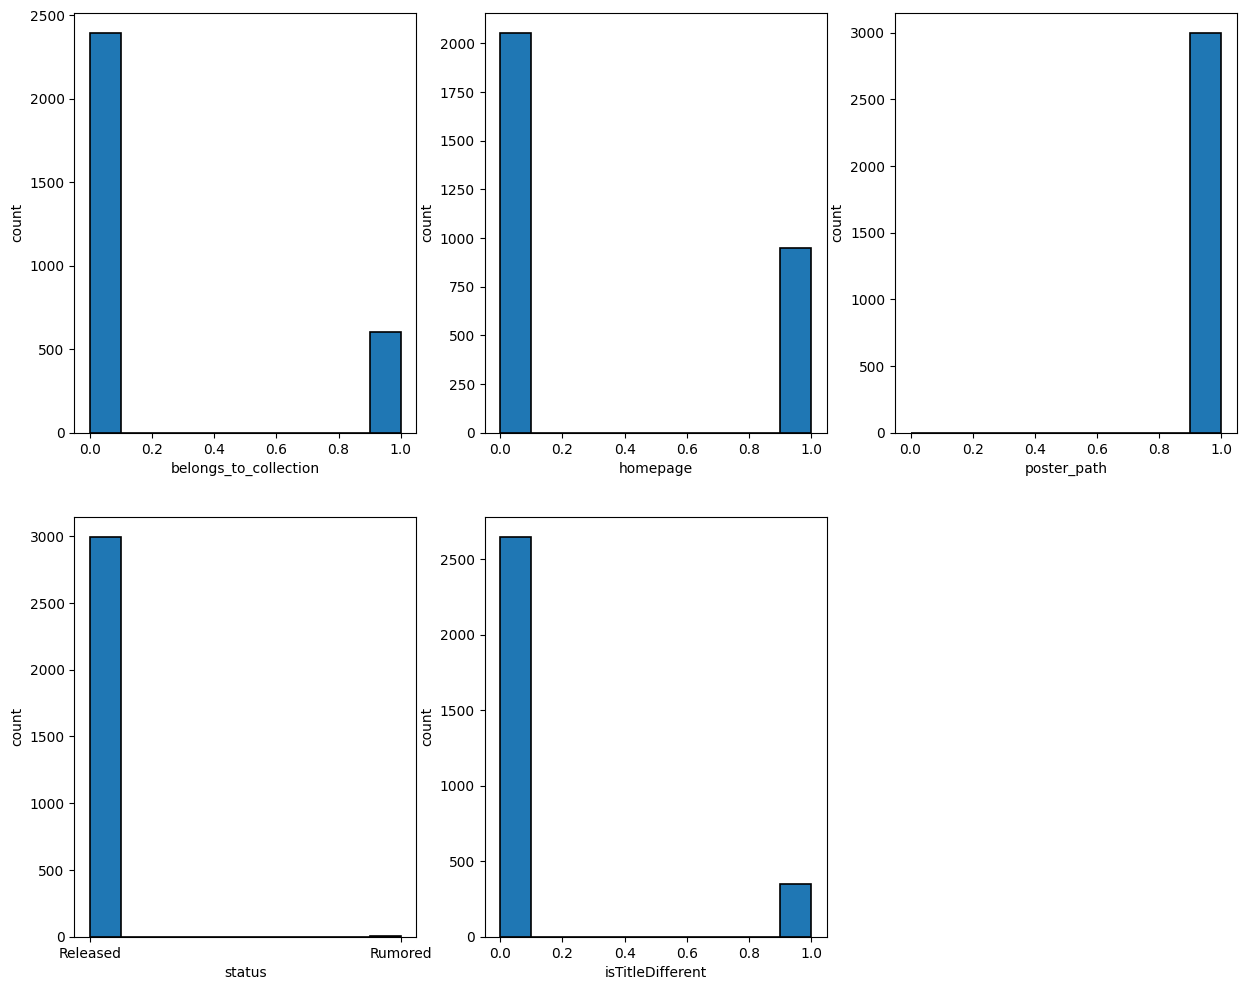

In [19]:
columns = ["belongs_to_collection", "homepage", "poster_path", "status", "isTitleDifferent"]
nrows = 2
ncols = 3
fig = plt.figure(figsize=(15, 12))
for i, col in enumerate(df[columns]):
    fig.add_subplot(nrows, ncols, i + 1)
    plt.hist(data=df[columns], x=col, edgecolor='black', linewidth=1.2)
    plt.xlabel(col)
    plt.ylabel("count")
#plt.savefig('fig1.png', bbox_inches='tight')
plt.show()

- Nhận xét:
  + Đa số các phim đều không thuộc bộ sưu tập: Do hầu hết các bộ sưu tập chỉ hướng đến một số thể loại nhất định trong khi đó các phim không nằm trong bộ sưu tập trải dài qua tất cả các thể loại trong cuộc sống từ đó giúp phim không nằm trong bộ sưu tập đa dạng hơn.
  + Số lượng phim có trang chủ ít hơn gần 2 lần so với số lượng phim không có trang chủ: Điều này có thể được lý giải như sau: Dựa vào quyết định của nhà sản xuất và nhà phân phối có tập trung vào quảng cáo và tiếp thị hay không.
  + Hầu hết số lượng phim đều có poster quảng cáo phim. Điều này là bắt buộc để có thể thu hút sự chú ý của khách hàng.
  + Hầu hết các phim đều đã được ra mắt, một số ít là tin đồn, điều này là vô lý bởi vì nếu là tin đồn thì làm sao ta có thể có doanh thu.
  + Số lượng phim có tiêu đề giống với tiêu đề gốc chiếm đa số so với phim có tiêu đề khác với tiêu đề gốc, các phim có tiêu đề khác với tiêu đề gốc thường là các phim không được sản xuất bằng Tiếng Anh.

###### Biểu đồ thể hiện thời gian ra mắt phim (ngày, tháng, năm, ngày trong tuần, quý).

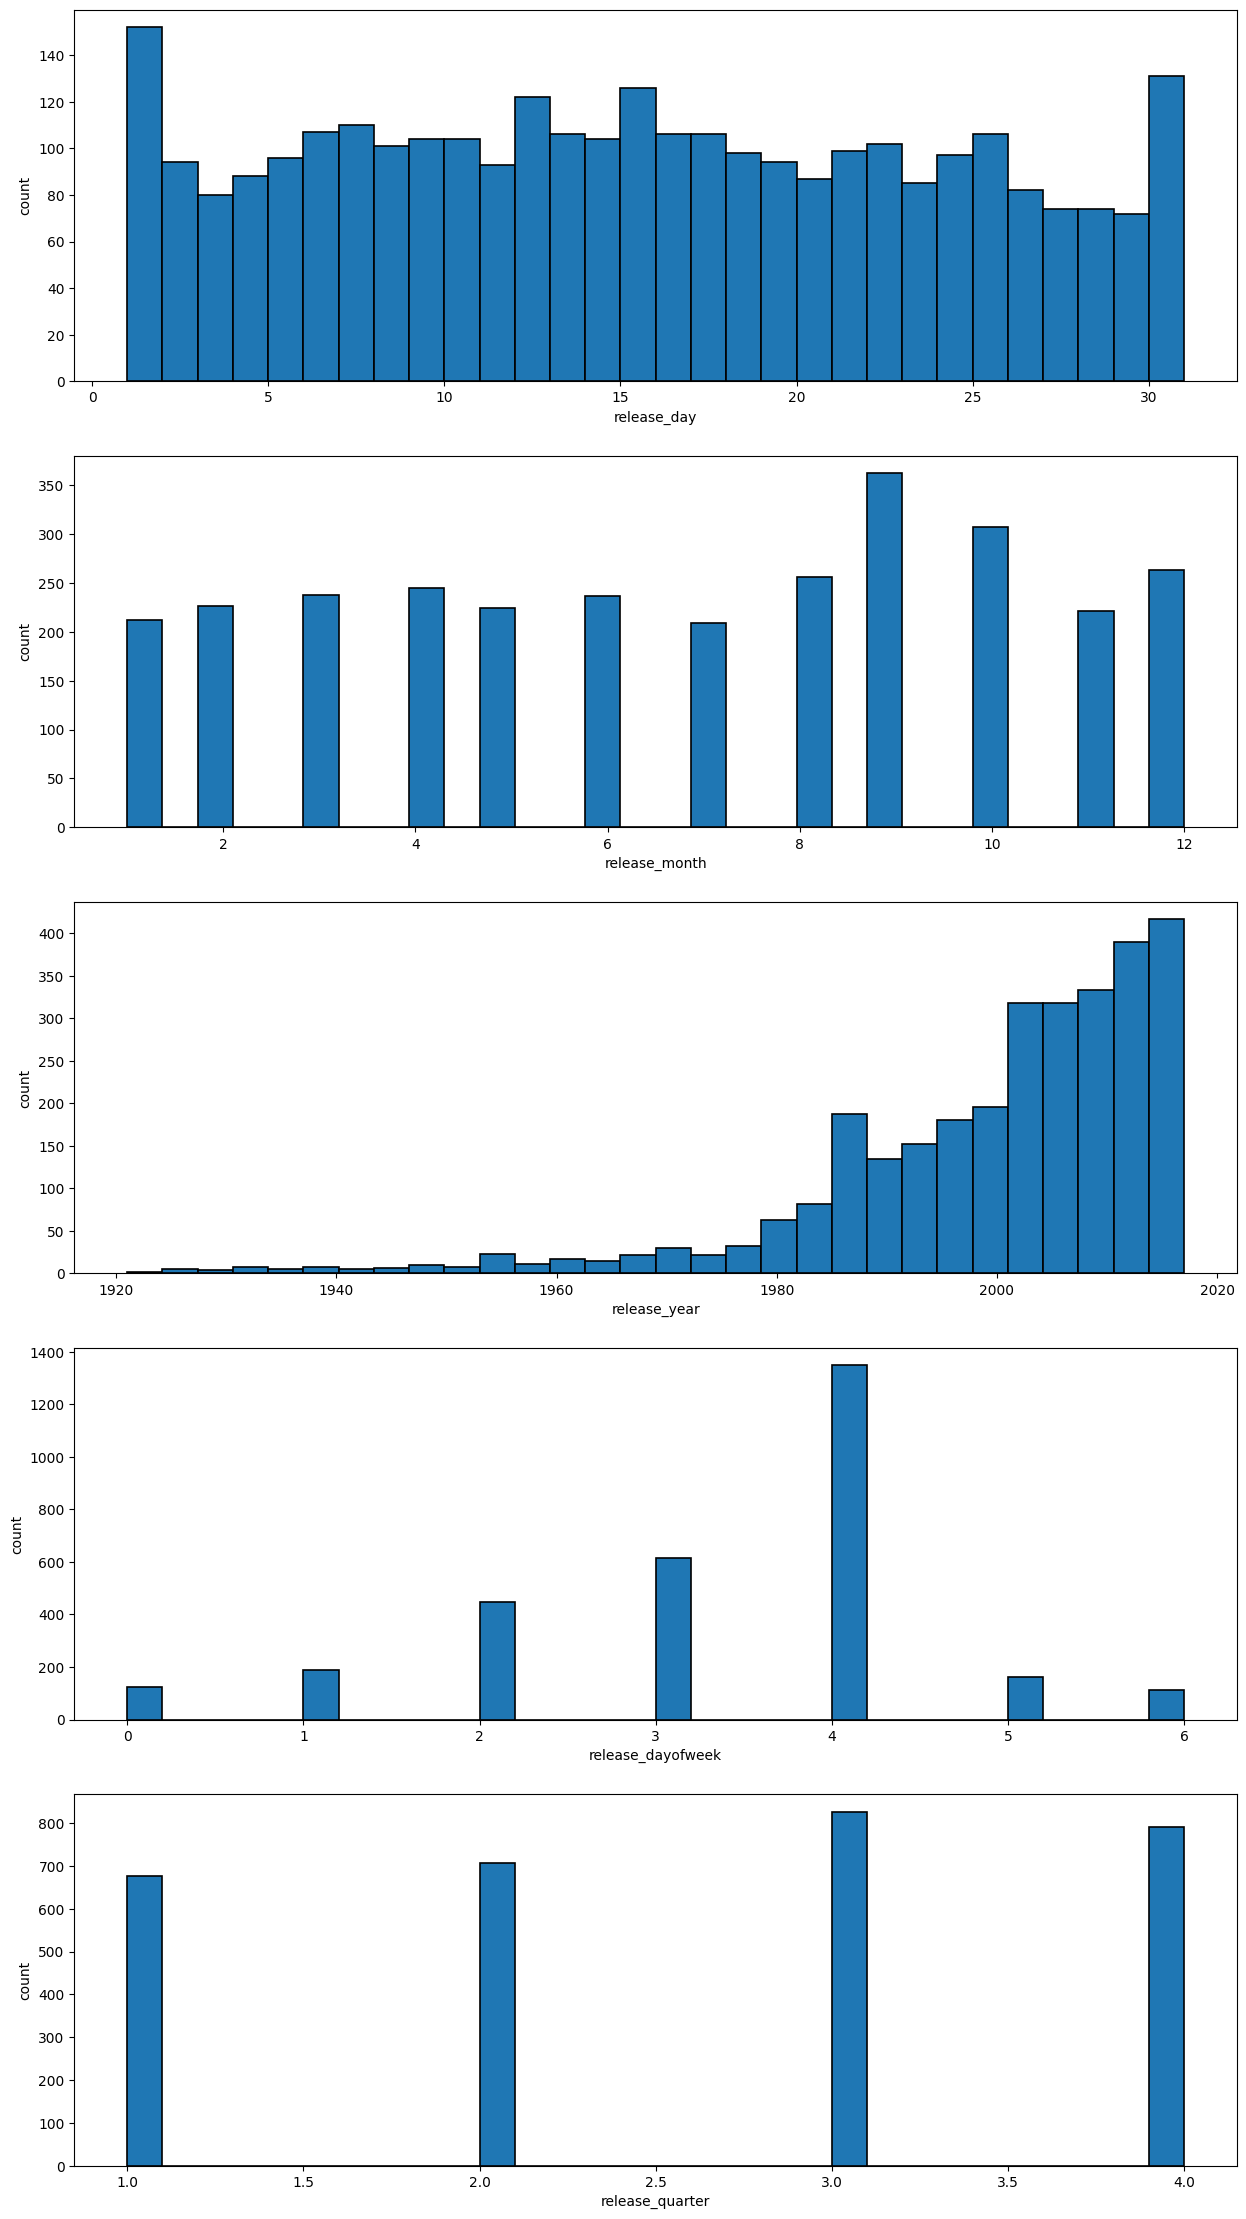

In [20]:
columns = ['release_day', 'release_month', 'release_year', 'release_dayofweek', 'release_quarter']
nrows = 5
ncols = 1
fig = plt.figure(figsize=(15, 28))
for i, col in enumerate(df[columns]):
    fig.add_subplot(nrows, ncols, i + 1)
    plt.hist(data=df[columns], x=col, bins=30, edgecolor='black', linewidth=1.2)
    plt.xlabel(col)
    plt.ylabel("count")
#plt.savefig('fig1.png', bbox_inches='tight')
plt.show()

- Nhận xét:
  - Phim ra mắt khá đều trong các ngày trong tháng, có khoảng đầu tháng và cuối tháng có số lượng phim ra mắt nhiều hơn không đáng kể so với các ngày còn lại.
  - Khoảng 8 tháng đầu tiên số lượng phim ra mắt đều qua mỗi tháng, 4 tháng cuối số lượng phim ra mắt nhiều hơn.
  - Càng về sau số lượng phim ra mắt càng nhiều để phục vụ nhu cầu càng cao của khán giả.
  - Số lượng phim ra mắt vào thứ Sáu cao hơn rất nhiều so với các ngày còn lại trong tuần.
  - Số lượng ra mắt các bộ phim qua các quý là khá đều nhau.

###### Biểu đồ thể hiện ngôn ngữ chính của phim.

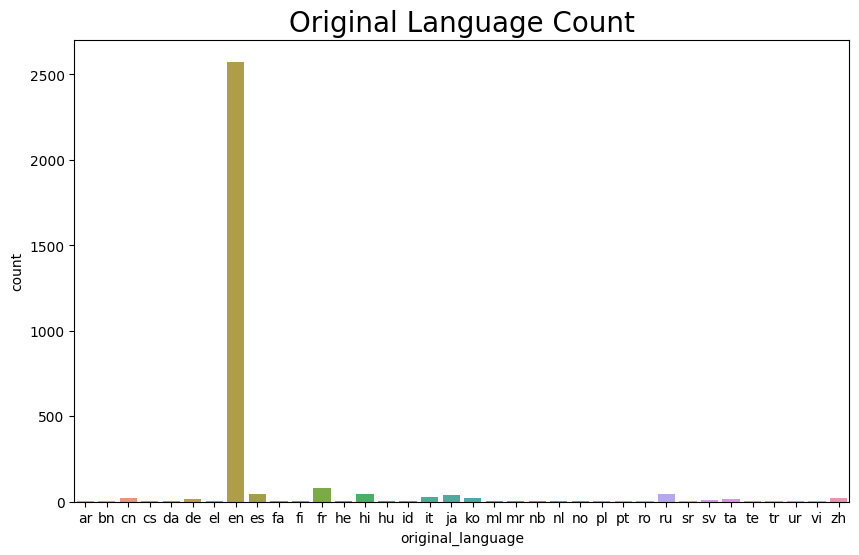

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='original_language', data=df.sort_values('original_language'))
plt.title("Original Language Count", fontsize=20)
#plt.savefig('fig1.png', bbox_inches='tight')
plt.show()

- Nhận xét: Ngôn ngữ chính được sử dụng trong hầu hết các phim là Tiếng Anh do đa số các nước nói Tiếng Anh đều có ngành công nghiệp điện ảnh vô cùng phát triển.

###### Biểu đồ thể hiện số lượng các thể loại phim.

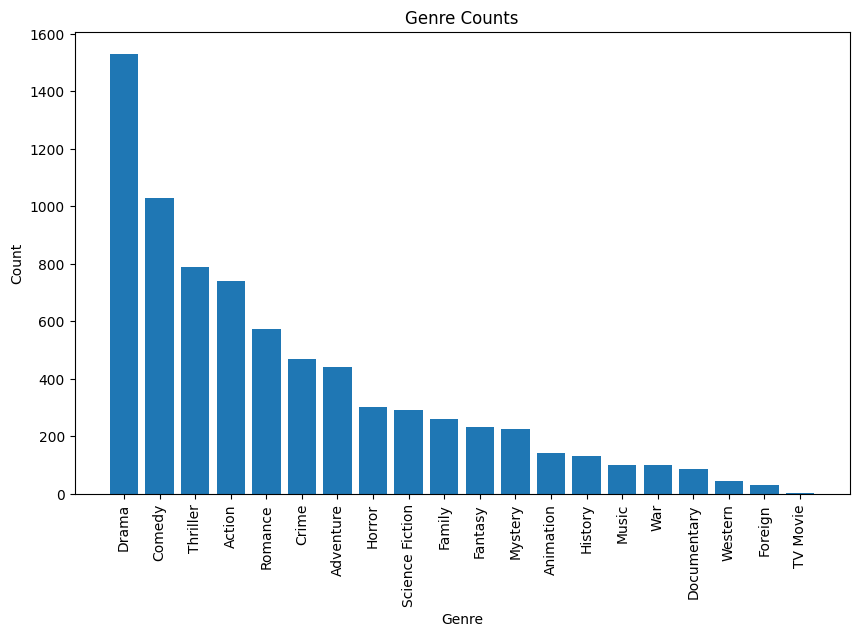

In [22]:
dummy_genre = pd.get_dummies(df['genre_names'].apply(pd.Series).stack()).sum(level=0)
dummy_genre = pd.DataFrame(dummy_genre)
genre_counts = dummy_genre.sum().sort_values(ascending=False)
genres = genre_counts.keys()
counts = genre_counts.values
plt.figure(figsize=(10, 6))
plt.bar(genres, counts)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Genre Counts')
#plt.savefig('fig1.png', bbox_inches='tight')
plt.show()

- Nhận xét:
  - Các thể loại phim như chính kịch, hài, giật gân, hành động, lãng mạn là những thể loại được sản xuất nhiều nhất.

###### Biểu đồ thể hiện top 10 công ty sản xuất phim nhiều nhất

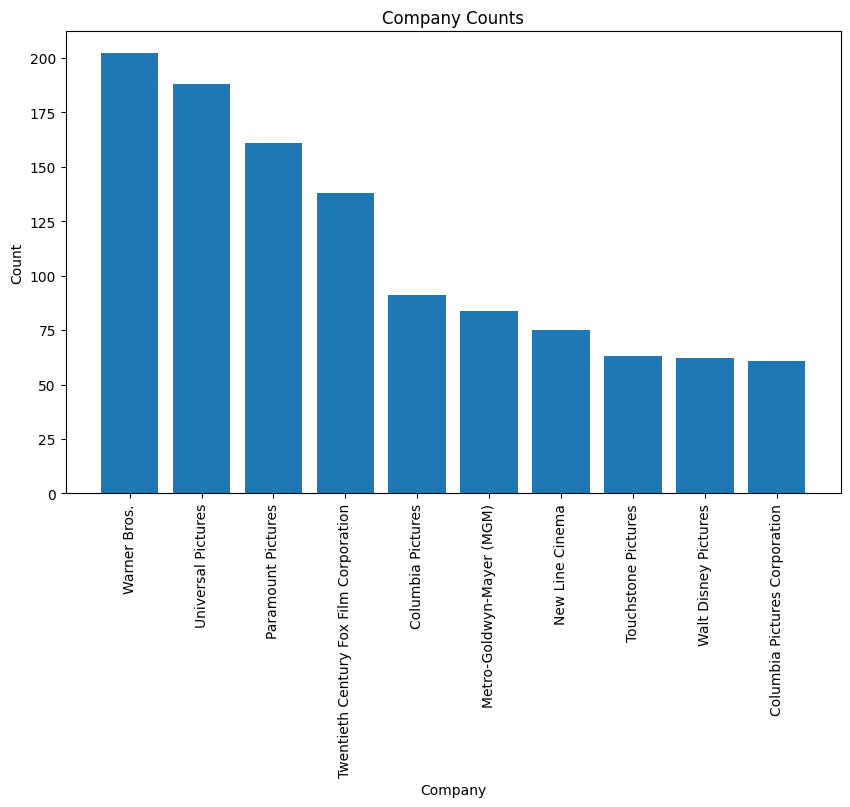

In [23]:
dummy_production_companies = pd.get_dummies(df['production_companies_names'].apply(pd.Series).stack()).sum(level=0)
dummy_production_companies = pd.DataFrame(dummy_production_companies)
production_companies_counts = dummy_production_companies.sum().sort_values(ascending=False)[:10]
production_companies = production_companies_counts.keys()
counts = production_companies_counts.values
plt.figure(figsize=(10, 6))
plt.bar(production_companies, counts)
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Company Counts')
#plt.savefig('fig1.png', bbox_inches='tight')
plt.show()

- Nhận xét:
  - Cả 10 công ty sản xuất phim nhiều nhất là những công ty nổi tiếng toàn cầu có xuất xứ ở Mỹ.

###### Biểu đồ thể hiện top 10 quốc gia sản xuất phim nhiều nhất

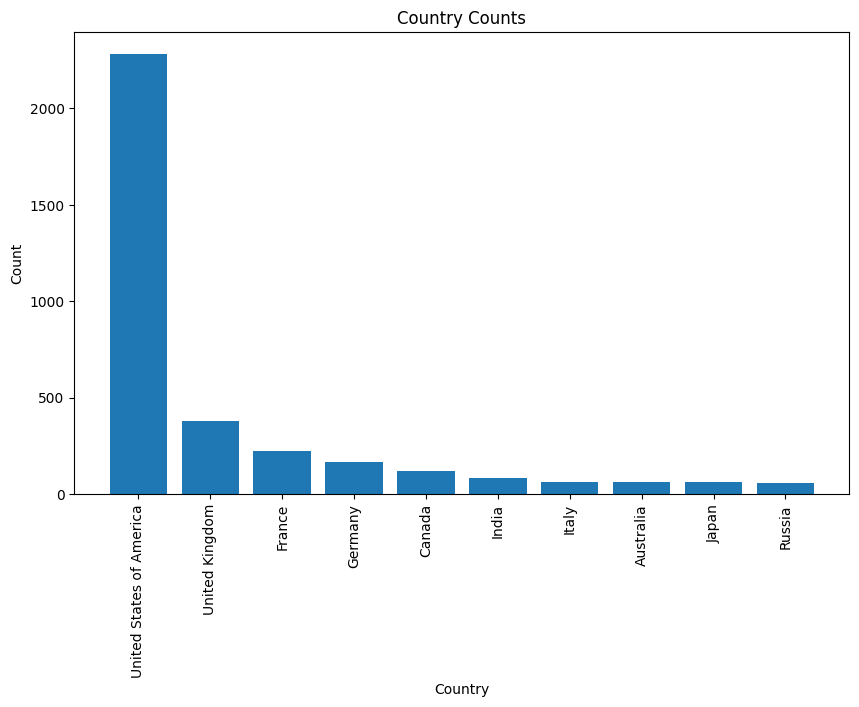

In [24]:
dummy_production_countries = pd.get_dummies(df['production_countries_names'].apply(pd.Series).stack()).sum(level=0)
dummy_production_countries = pd.DataFrame(dummy_production_countries)
production_countries_counts = dummy_production_countries.sum().sort_values(ascending=False)[:10]
production_countries = production_countries_counts.keys()
counts = production_countries_counts.values
plt.figure(figsize=(10, 6))
plt.bar(production_countries, counts)
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Country Counts')
#plt.savefig('fig1.png', bbox_inches='tight')
plt.show()

- Nhận xét:
  - Mỹ chiếm áp đảo so với phần còn lại về số lượng phim được sản xuất.
  - Trong top 10 có đến 8 quốc gia đến từ phương Tây., chỉ có 1 nước đến từ châu Á và 1 nước đến từ châu Úc.
  - Điều này thể hiện sự chênh lệch rất lớn giữa các nước trong việc sản xuất phim.

###### Biểu đồ thể hiện top 10 ngôn ngữ được nói nhiều nhất trong phim

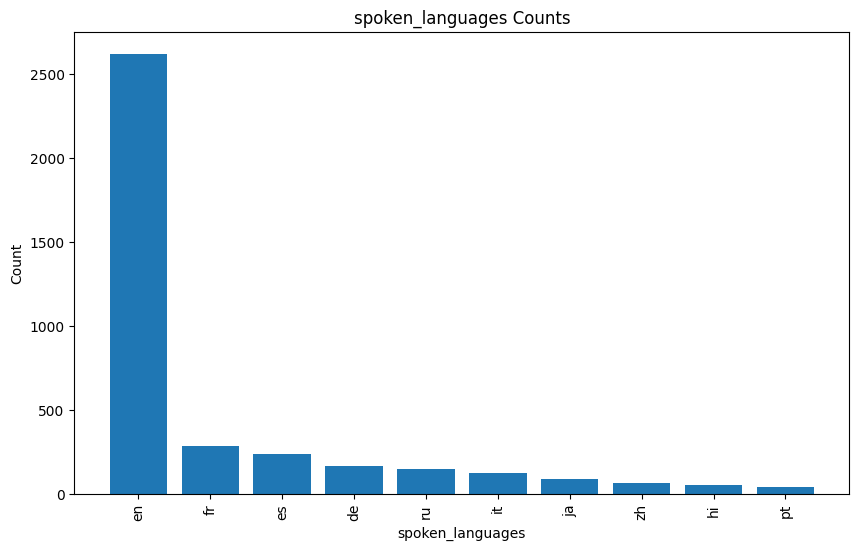

In [25]:
dummy_spoken_languages = pd.get_dummies(df['spoken_languages_tag'].apply(pd.Series).stack()).sum(level=0)
dummy_spoken_languages = pd.DataFrame(dummy_spoken_languages)
spoken_languages_counts = dummy_spoken_languages.sum().sort_values(ascending=False)[:10]
spoken_languages = spoken_languages_counts.keys()
counts = spoken_languages_counts.values
plt.figure(figsize=(10, 6))
plt.bar(spoken_languages, counts)
plt.xlabel('spoken_languages')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('spoken_languages Counts')
#plt.savefig('fig1.png', bbox_inches='tight')
plt.show()

- Nhận xét:
 - Tiếng Anh được nói trong phim áp đảo sao với các ngôn ngữ còn lại.

###### Biểu đồ thể hiện top 20 từ khóa được dùng trong các bộ phim

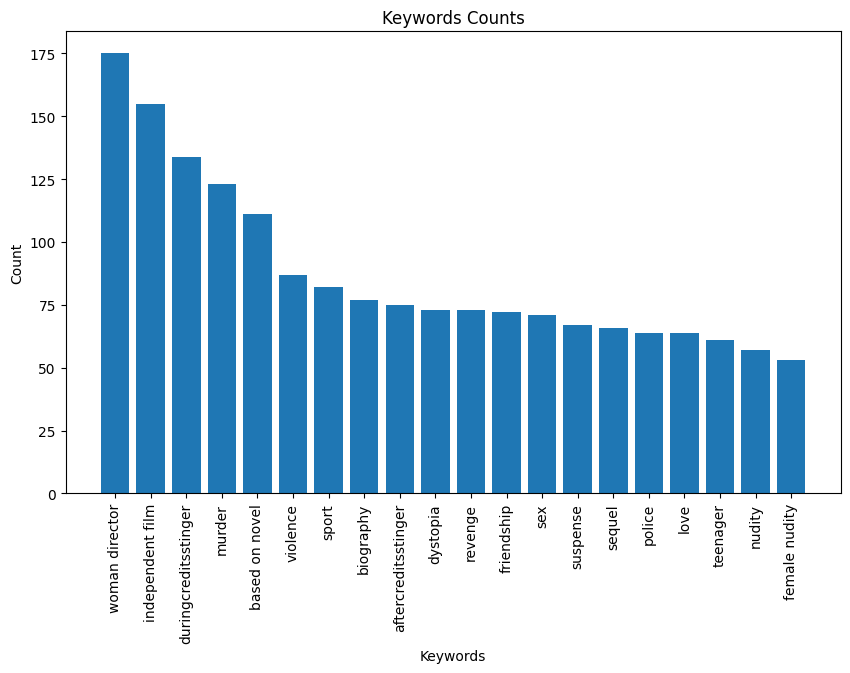

In [26]:
dummy_Keywords = pd.get_dummies(df['Keywords_tag'].apply(pd.Series).stack()).sum(level=0)
dummy_Keywords = pd.DataFrame(dummy_Keywords)
Keywords_counts = dummy_Keywords.sum().sort_values(ascending=False)[:20]
Keywords = Keywords_counts.keys()
counts = Keywords_counts.values
plt.figure(figsize=(10, 6))
plt.bar(Keywords, counts)
plt.xlabel('Keywords')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Keywords Counts')
#plt.savefig('fig1.png', bbox_inches='tight')
plt.show()

###### Biểu đồ thể hiện top 20 diễn viên xuất hiện nhiều nhất

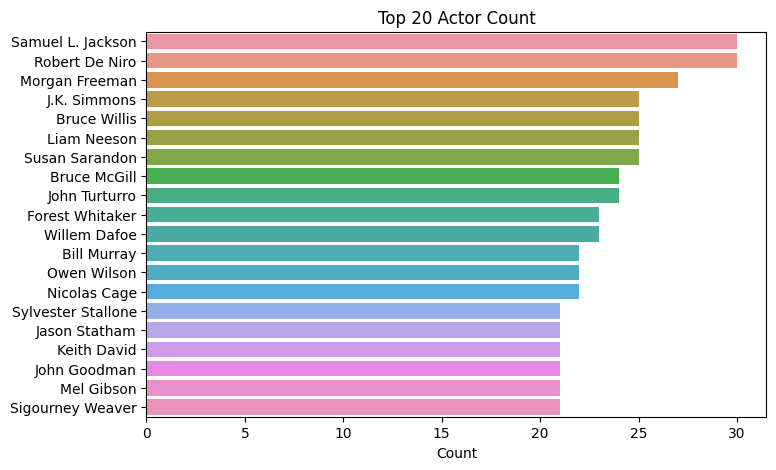

In [27]:
cast_per = df['cast'].apply(lambda x: [i['name'] for i in x] if x != {} else [])
cast_count = Counter([i for j in cast_per for i in j]).most_common(20)
fig = plt.figure(figsize=(8, 5))
sns.barplot(x=[val[1] for val in cast_count],y=[val[0] for val in cast_count])
plt.xlabel('Count')
plt.title('Top 20 Actor Count')
#plt.savefig('fig1.png', bbox_inches='tight')
plt.show()

###### Những từ xuất hiện nhiều nhất trong tóm tắt phim.

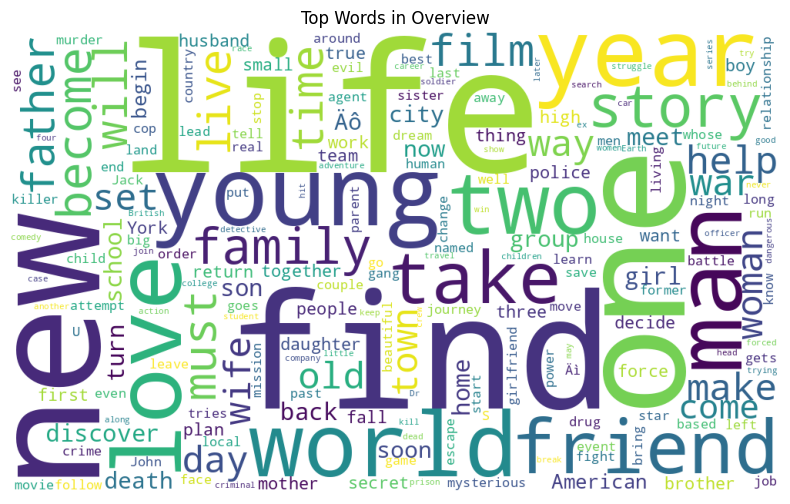

In [28]:
text = ' '.join(df['overview'].apply(lambda x:x if x is not np.nan else ''))
plt.figure(figsize = (10, 6))
wordcloud = WordCloud(max_font_size=None, collocations=False, background_color="white", width=1000, height=600).generate(text)
plt.imshow(wordcloud)
plt.title('Top Words in Overview')
plt.axis("off")
#plt.savefig('fig1.png', bbox_inches='tight')
plt.show()

###### Những từ xuất hiện nhiều nhất trong khẩu hiệu phim.

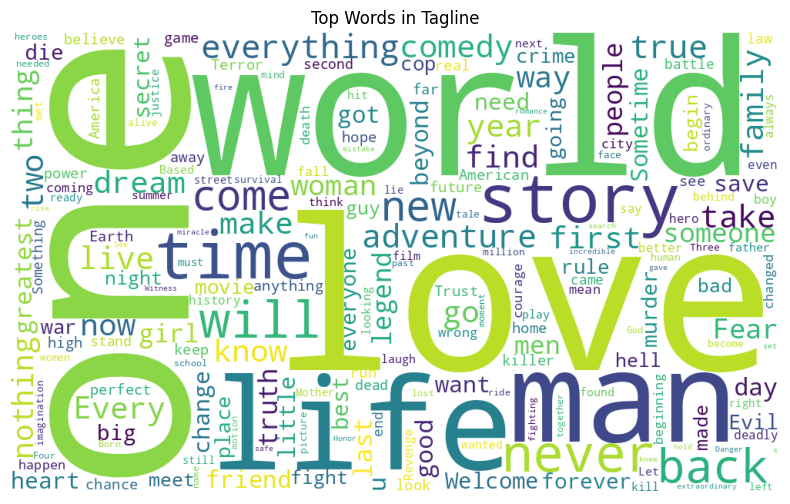

In [29]:
text = ' '.join(df['tagline'].apply(lambda x:x if x is not np.nan else ''))
plt.figure(figsize = (10, 6))
wordcloud = WordCloud(max_font_size=None, collocations=False, background_color="white", width=1000, height=600).generate(text)
plt.imshow(wordcloud)
plt.title('Top Words in Tagline')
plt.axis("off")
#plt.savefig('fig1.png', bbox_inches='tight')
plt.show()

###### Biểu đồ thể hiện phân bố của các biến `budget`, `runtime`, `popularity`, `revenue`.

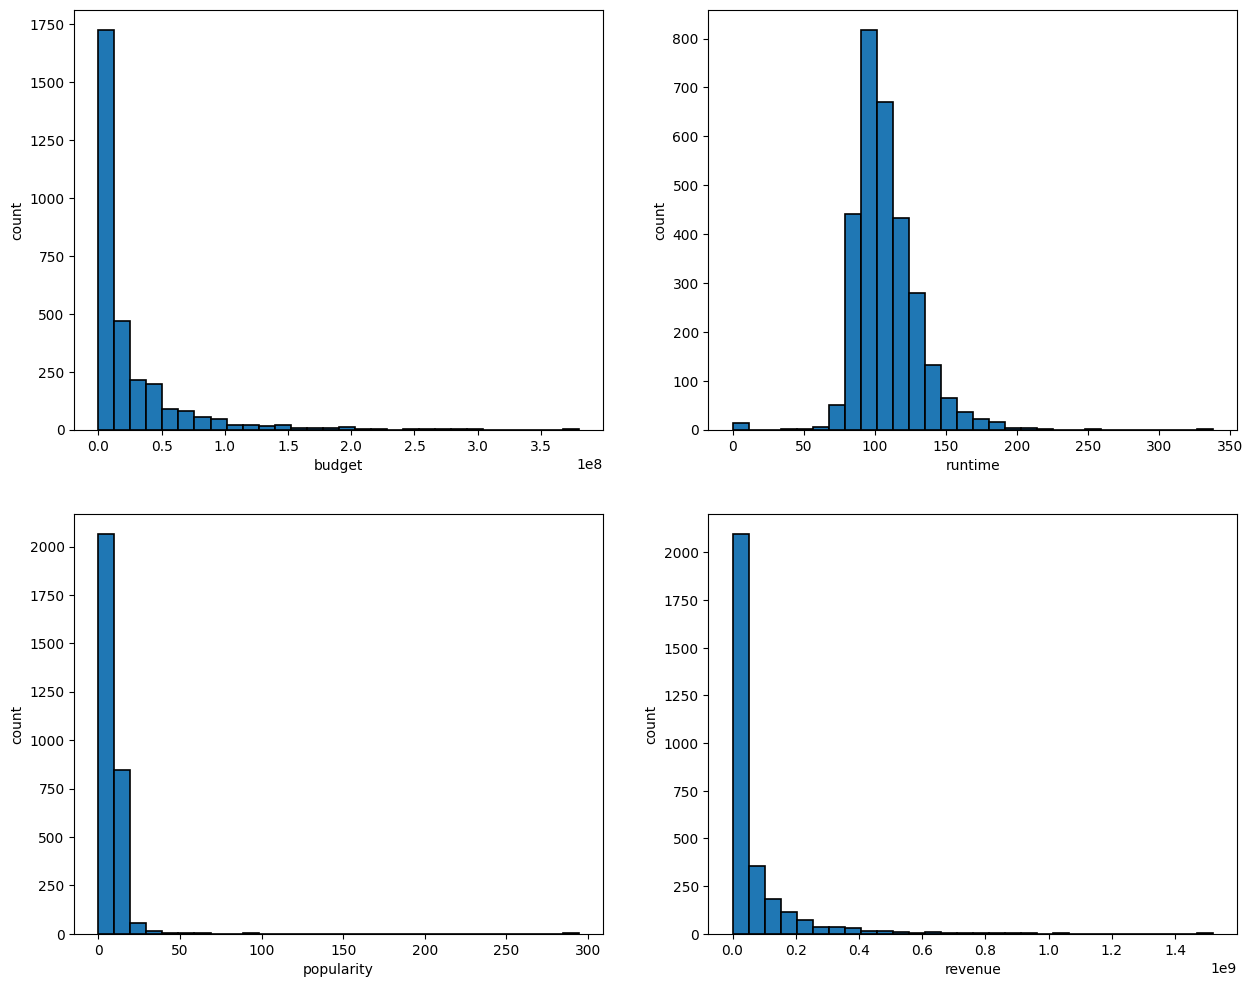

In [30]:
columns = ['budget', 'runtime', 'popularity', 'revenue']
nrows = 2
ncols = 2
fig = plt.figure(figsize=(15, 12))
for i, col in enumerate(df[columns]):
    fig.add_subplot(nrows, ncols, i + 1)
    plt.hist(data=df[columns], x=col, bins=30, edgecolor='black', linewidth=1.2)
    plt.xlabel(col)
    plt.ylabel("count")
#plt.savefig('fig1.png', bbox_inches='tight')
plt.show()

- Nhận xét:
  - Đa số các biểu đồ đều bị lệch trái.
  - Các phim có độ nổi tiếng chủ yếu  từ 0 đến 50.
  - Thời lượng phim kéo dài chủ yếu từ 75 phút đền 180 phút.
  - Kinh phí phát triển phim từ 10.000.000 đến 1.000.000.000.
  - Doanh thu bộ phim mang về từ 15.000.000 đến 800.000.000.

##### **2.2.3.2. Phân tích 2 biến**

###### Biểu đồ thể hiện phần trăm doanh thu theo thể loại phim.

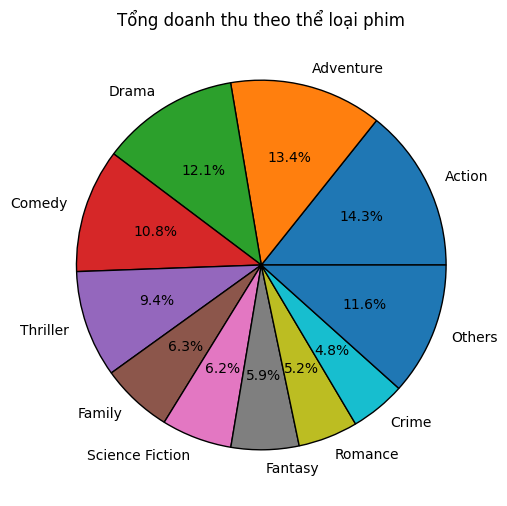

In [31]:
dummy_genre["revenue"] = df["revenue"]
genre_revennue = pd.DataFrame()
genres = []
revenues = []
for genre in dummy_genre[:-1]:
    revenue = dummy_genre[genre] * dummy_genre['revenue']
    genres.append(genre)
    revenues.append(revenue.sum())

genre_revennue["genre"] = genres
genre_revennue["revenue"] = revenues
genre_revennue = genre_revennue[:-1].sort_values(by="revenue", ascending=False).reset_index(drop=True)
revennue_by_genre = genre_revennue.loc[:9, "genre":"revenue"]
revennue_by_genre.loc[len(revennue_by_genre.index)] = ['Others', genre_revennue['revenue'][10:].sum()]

plt.figure(figsize=(8,6))
plt.pie(revennue_by_genre.loc[0:, "revenue"], labels=revennue_by_genre.loc[0:, "genre"], autopct='%1.1f%%', wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
plt.title('Tổng doanh thu theo thể loại phim')
#plt.savefig('fig1.png', bbox_inches='tight')
plt.show()

- Nhận xét:
  - Chỉ với 4 thể loại phim là Action, Adventure, Drama, Comedy đã chiếm tới xấp xỉ 50% doanh thu của các phim. Chứng tỏ đây là 4 thể loại được khán giả yếu thích nhất.

###### Biểu đồ thể hiện phần trăm doanh thu theo đất nước sản xuất phim.

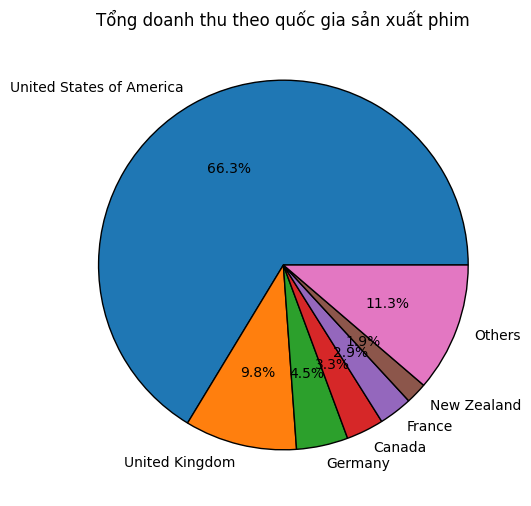

In [32]:
dummy_production_countries["revenue"] = df["revenue"]
countries_revennue = pd.DataFrame()
countries = []
revenues = []
for country in dummy_production_countries[:-1]:
    revenue = dummy_production_countries[country] * dummy_production_countries['revenue']
    countries.append(country)
    revenues.append(revenue.sum())

countries_revennue["country"] = countries
countries_revennue["revenue"] = revenues
countries_revennue = countries_revennue[:-1].sort_values(by="revenue", ascending=False).reset_index(drop=True)
revennue_by_countries = countries_revennue.loc[:5, "country":"revenue"]
revennue_by_countries.loc[len(revennue_by_countries.index)] = ['Others', countries_revennue['revenue'][6:].sum()]

plt.figure(figsize=(8,6))
plt.pie(revennue_by_countries.loc[0:, "revenue"], labels=revennue_by_countries.loc[0:, "country"], autopct='%1.1f%%', wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
plt.title('Tổng doanh thu theo quốc gia sản xuất phim')
#plt.savefig('fig1.png', bbox_inches='tight')
plt.show()

- Nhận xét:
  - Mỹ vẫn áp đảo phần còn lại của Thế giới khi chiếm tới gần 2/3 doanh thu phim. Chứng tỏ vị thế phim của Mỹ là không thể bàn cãi.

###### Biểu đồ thể hiện phần trăm doanh thu theo công ty sản xuất phim.

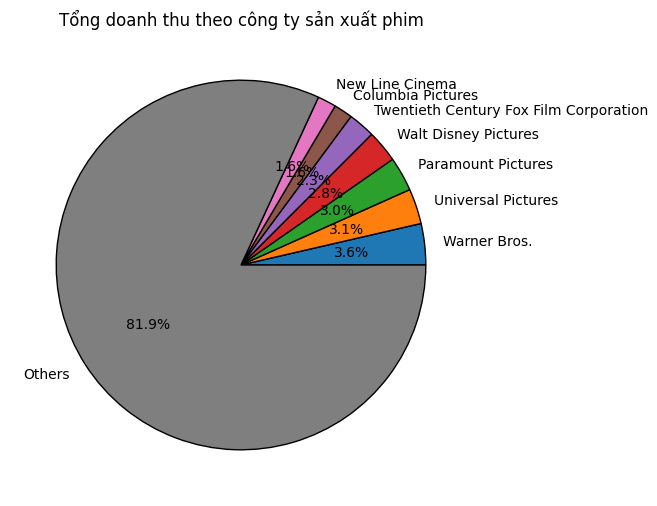

In [33]:
dummy_production_companies["revenue"] = df["revenue"]
companies_revennue = pd.DataFrame()
companies = []
revenues = []
for company in dummy_production_companies[:-1]:
    revenue = dummy_production_companies[company] * dummy_production_companies['revenue']
    companies.append(company)
    revenues.append(revenue.sum())

companies_revennue["company"] = companies
companies_revennue["revenue"] = revenues
companies_revennue = companies_revennue[:-1].sort_values(by="revenue", ascending=False).reset_index(drop=True)
revennue_by_companies = companies_revennue.loc[:6, "company":"revenue"]
revennue_by_companies.loc[len(revennue_by_companies.index)] = ['Others', companies_revennue['revenue'][7:].sum()]

plt.figure(figsize=(8,6))
plt.pie(revennue_by_companies.loc[0:, "revenue"], labels=revennue_by_companies.loc[0:, "company"], autopct='%1.1f%%', wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
plt.title('Tổng doanh thu theo công ty sản xuất phim')
plt.savefig('fig1.png', bbox_inches='tight')
plt.show()

- Nhận xét:
  - 7 công ty hàng đầu nước Mỹ chiếm tới gần 20% doanh thu phim toàn cầu.

###### Biểu đồ thể hiện các mối quan hệ theo cặp của các thuộc tính `budget`, `runtime`, `popularity`, `revenue`.

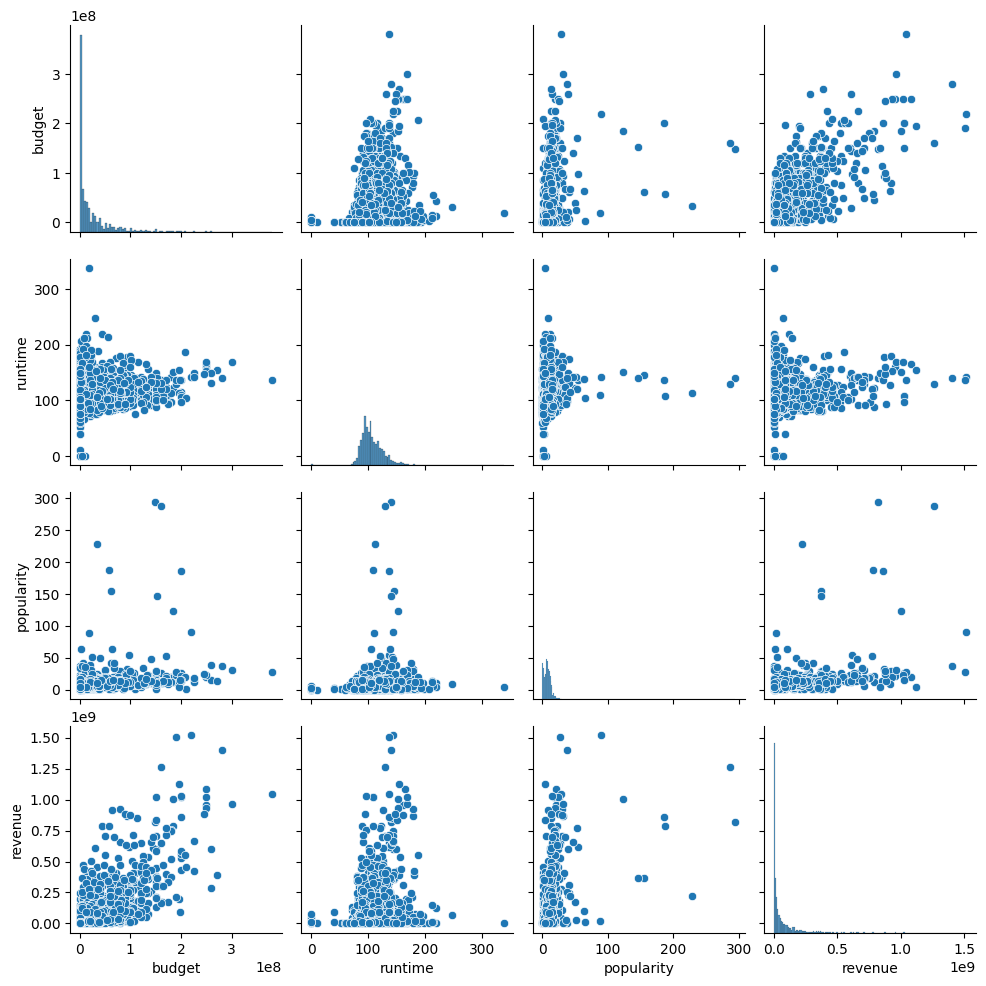

In [34]:
columns = ['budget', 'runtime', 'popularity', 'revenue']
sns.pairplot(data= df[columns])
#plt.savefig('fig1.png', bbox_inches='tight')
plt.show()

- Nhận xét:
  + Khi thể hiện mối tương quan của biến **`popularity`** với biến **`revenue`**: Khi biến **`popularity`** tăng (với tốc độ chậm) trong khoảng 0 - 100 thì **`revenue`** cũng tăng theo, ngoài khoảng 0 - 100 thì sẽ bắt đầu có dấu hiệu giảm.
  + Khi thể hiện mối tương quan của biến **`runtime`** với biến **`revenue`**: Khi biến **`runtime`** tăng (với tốc độ chậm) trong khoảng 75 - 180 thì **`revenue`** cũng tăng theo, ngoài khoảng 75 - 180 thì sẽ bắt đầu có dấu hiệu giảm.
  + Khi thể hiện mối tương quan của biến **`budget`** với biến **`revenue`**: Khi biến **`budget`** tăng thì **`revenue`** cũng tăng theo.
  + Khi thể hiện mối tương quan của biến **`popularity`** với biến **`budget`**: Khi biến **`popularity`** tăng (với tốc độ chậm) trong khoảng 0 - 100 thì **`budget`** cũng tăng theo, ngoài khoảng 0 - 100 thì sẽ bắt đầu có dấu hiệu giảm.
  + Khi thể hiện mối tương quan của biến **`runtime`** với biến **`budget`**: Khi biến **`runtime`** tăng (với tốc độ chậm) trong khoảng 75 - 180 thì **`budget`** cũng tăng theo, ngoài khoảng 75 - 180 thì sẽ bắt đầu có dấu hiệu giảm.
  + Khi thể hiện mối tương quan của biến **`popularity`** với biến **`runtime`**: Khi biến **`popularity`** tăng (với tốc độ chậm) trong khoảng 0 - 100 thì **`runtime`** popularity tăng theo (với tốc độ chậm) trong khoảng 75 - 180.

###### Biểu đồ thể hiện mối tương quan giữa các thuộc tính có dữ liệu dạng số.

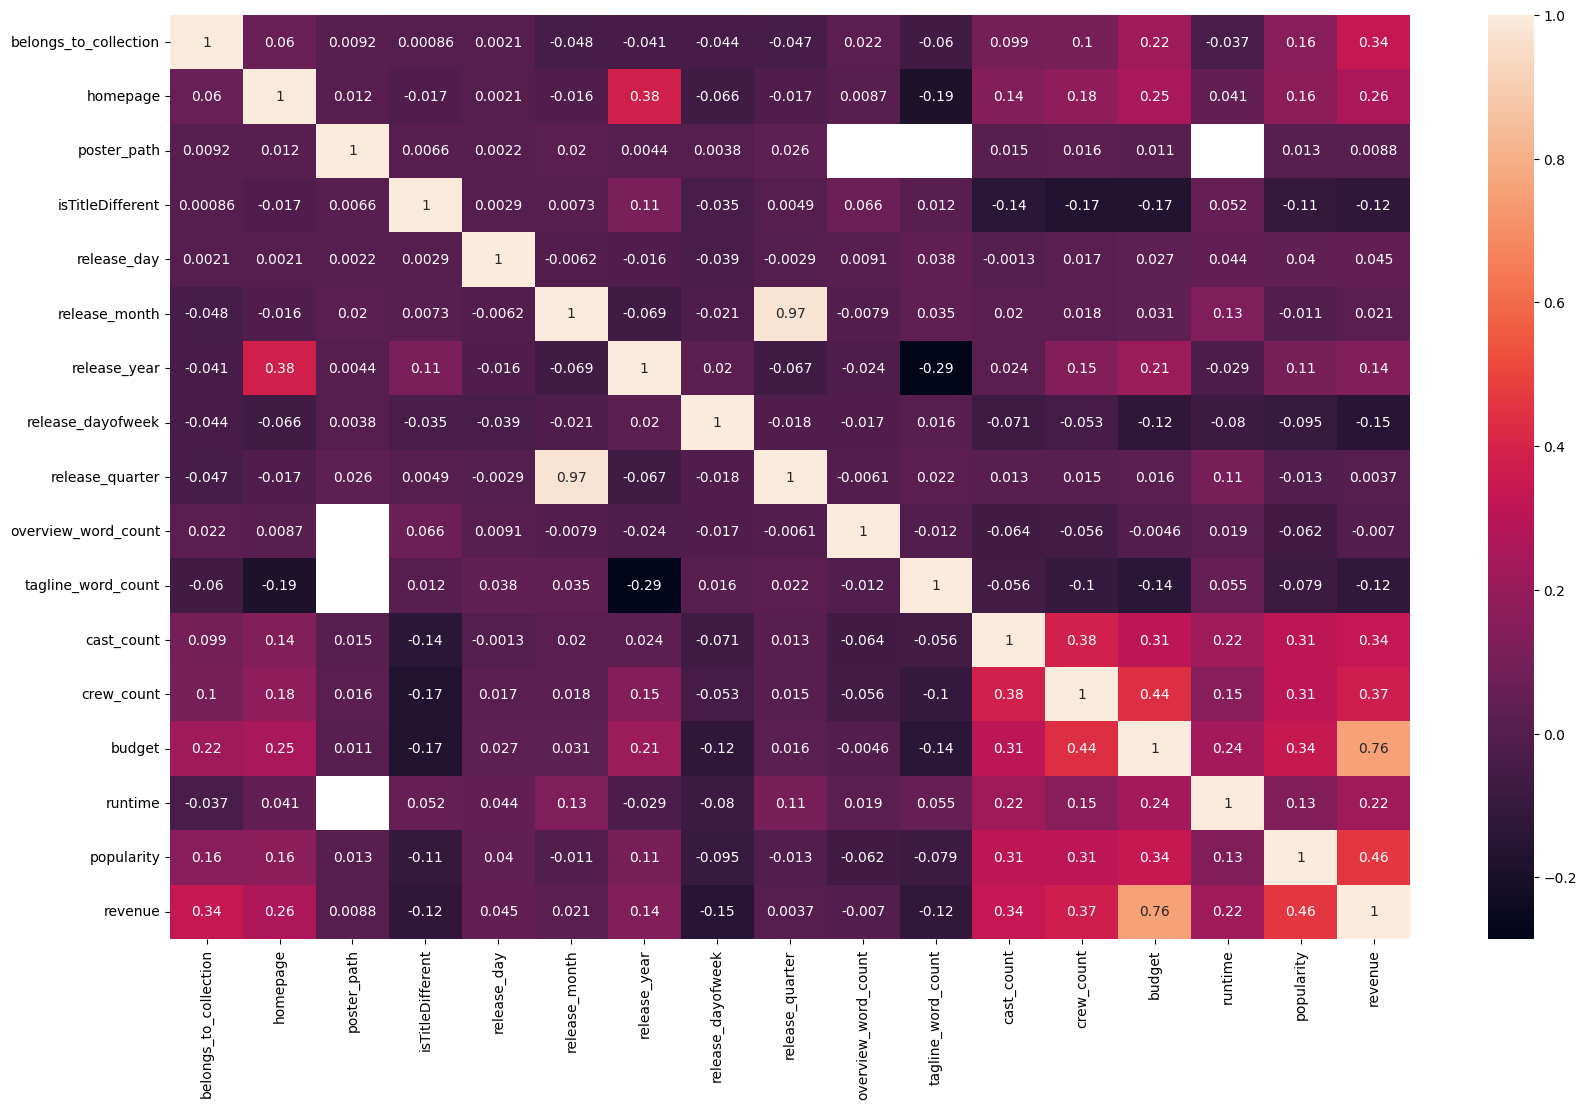

In [35]:
columns = ["belongs_to_collection", "homepage", "poster_path", "status", "isTitleDifferent",
           'release_day', 'release_month', 'release_year', 'release_dayofweek', 'release_quarter',
           "overview_word_count", "tagline_word_count", "cast_count", "crew_count",
           'budget', 'runtime', 'popularity', 'revenue']
plt.figure(figsize=(20,12))
corr_matrix = df[columns].corr()
sns.heatmap(corr_matrix, annot=True)
#plt.savefig('fig1.png', bbox_inches='tight')
plt.show()

- Nhận xét:
  - Thuộc tính **`revenue`** có mối tương quan mạnh với các thuộc tính **`revenue`**, **`homepage`**, **`cast_count`**, **`crew_count`**, **`budget`**, **`runtime`**, **`popularity`**.

##### **2.2.3.3. Phân tích đa biến**

###### Biểu đồ thể hiện phân bố của `revenue`, `budget` và `belongs_to_collection`

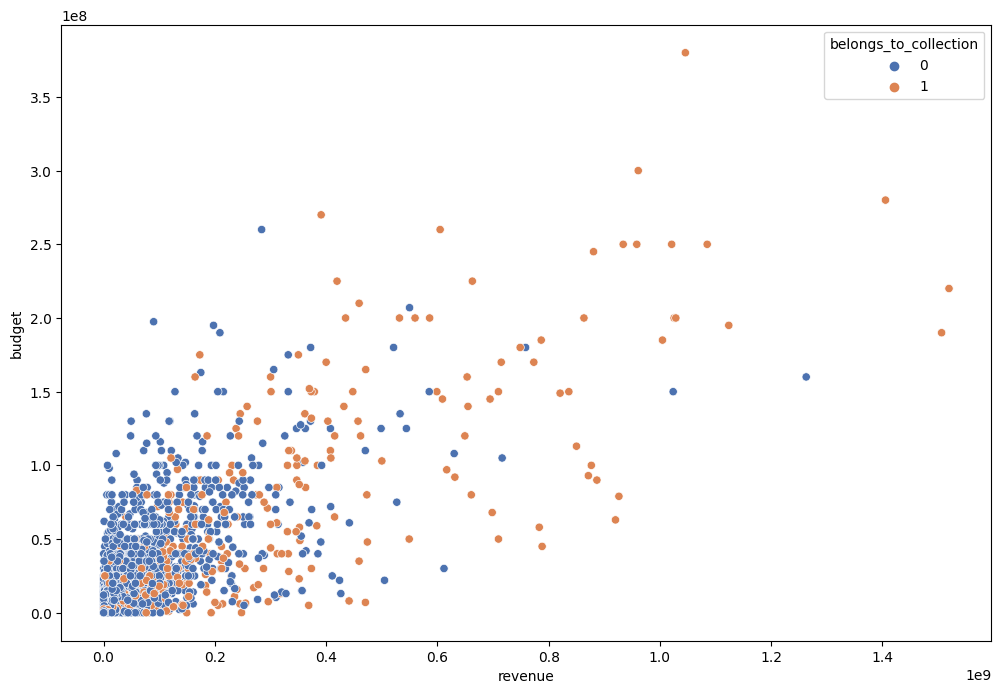

In [36]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(data=df, x='revenue', y='budget', 
                     hue='belongs_to_collection', palette='deep')
#plt.savefig('fig1.png', bbox_inches='tight')
plt.show()

- Nhận xét:
  - Các phim nằm trong bộ sưu tập có kinh phí sản xuất và doanh thu cao hơn so với phim nằm không nằm trong bộ sưu tập.

###### Biểu đồ 3 chiều thể hiện phân bố của `revenue`, `budget` và `runtime`

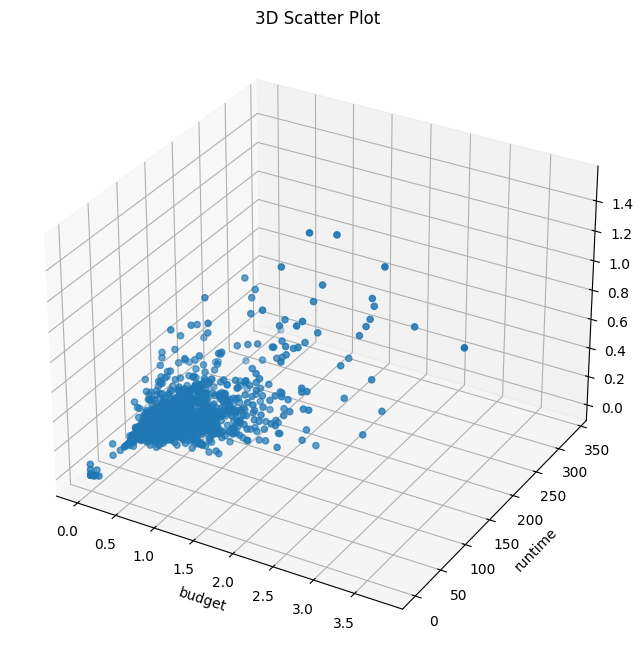

In [37]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["budget"], df["runtime"], df["revenue"])
ax.set_xlabel('budget')
ax.set_ylabel('runtime')
ax.set_zlabel('revenue')
plt.title('3D Scatter Plot')
#plt.savefig('fig1.png', bbox_inches='tight')
plt.show()

- Nhận xét:
  - Đa số các điểm dữ liệu nằm trên khoảng 75 - 180 của trục **`runtime`**, khoảng 0 - 1.5 của trục **`budget`** và khoảng 0 - 0.4 của trục **`revenue`**.

## Giai đoạn 3:

In [38]:
train = pd.read_csv("train.csv", encoding='utf-8')
test = pd.read_csv("test.csv", encoding='utf-8')

### 3.0. Sửa một số dữ liệu

In [39]:
train.loc[train['id'] == 16,'revenue'] = 192864
train.loc[train['id'] == 90,'budget'] = 30000000     
train.loc[train['id'] == 118,'budget'] = 60000000
train.loc[train['id'] == 149,'budget'] = 18000000
train.loc[train['id'] == 313,'revenue'] = 12000000
train.loc[train['id'] == 451,'revenue'] = 12000000
train.loc[train['id'] == 464,'budget'] = 20000000
train.loc[train['id'] == 470,'budget'] = 13000000
train.loc[train['id'] == 513,'budget'] = 930000
train.loc[train['id'] == 797,'budget'] = 8000000
train.loc[train['id'] == 819,'budget'] = 90000000
train.loc[train['id'] == 850,'budget'] = 90000000
train.loc[train['id'] == 1007,'budget'] = 2
train.loc[train['id'] == 1112,'budget'] = 7500000
train.loc[train['id'] == 1131,'budget'] = 4300000
train.loc[train['id'] == 1359,'budget'] = 10000000
train.loc[train['id'] == 1542,'budget'] = 1 
train.loc[train['id'] == 1570,'budget'] = 15800000
train.loc[train['id'] == 1571,'budget'] = 4000000
train.loc[train['id'] == 1714,'budget'] = 46000000
train.loc[train['id'] == 1721,'budget'] = 17500000
train.loc[train['id'] == 1865,'revenue'] = 25000000
train.loc[train['id'] == 1885,'budget'] = 12
train.loc[train['id'] == 2091,'budget'] = 10  
train.loc[train['id'] == 2268,'budget'] = 17500000
train.loc[train['id'] == 2491,'budget'] = 6          
train.loc[train['id'] == 2602,'budget'] = 31000000
train.loc[train['id'] == 2612,'budget'] = 15000000
train.loc[train['id'] == 2696,'budget'] = 10000000
train.loc[train['id'] == 2801,'budget'] = 10000000
train.loc[train['id'] == 335,'budget'] = 2 
train.loc[train['id'] == 348,'budget'] = 12
train.loc[train['id'] == 470,'budget'] = 13000000 
train.loc[train['id'] == 513,'budget'] = 1100000
train.loc[train['id'] == 640,'budget'] = 6 
train.loc[train['id'] == 696,'budget'] = 1
train.loc[train['id'] == 797,'budget'] = 8000000 
train.loc[train['id'] == 850,'budget'] = 1500000
train.loc[train['id'] == 1199,'budget'] = 5 
train.loc[train['id'] == 1282,'budget'] = 9
train.loc[train['id'] == 1347,'budget'] = 1
train.loc[train['id'] == 1755,'budget'] = 2
train.loc[train['id'] == 1801,'budget'] = 5
train.loc[train['id'] == 1918,'budget'] = 592 
train.loc[train['id'] == 2033,'budget'] = 4
train.loc[train['id'] == 2118,'budget'] = 344 
train.loc[train['id'] == 2252,'budget'] = 130
train.loc[train['id'] == 2256,'budget'] = 1 
train.loc[train['id'] == 2696,'budget'] = 10000000

test.loc[test['id'] == 6733,'budget'] = 5000000
test.loc[test['id'] == 3889,'budget'] = 15000000
test.loc[test['id'] == 6683,'budget'] = 50000000
test.loc[test['id'] == 5704,'budget'] = 4300000
test.loc[test['id'] == 6109,'budget'] = 281756
test.loc[test['id'] == 7242,'budget'] = 10000000
test.loc[test['id'] == 7021,'budget'] = 17540562
test.loc[test['id'] == 5591,'budget'] = 4000000
test.loc[test['id'] == 4282,'budget'] = 20000000
test.loc[test['id'] == 3033,'budget'] = 250 
test.loc[test['id'] == 3051,'budget'] = 50
test.loc[test['id'] == 3084,'budget'] = 337
test.loc[test['id'] == 3224,'budget'] = 4  
test.loc[test['id'] == 3594,'budget'] = 25  
test.loc[test['id'] == 3619,'budget'] = 500  
test.loc[test['id'] == 3831,'budget'] = 3  
test.loc[test['id'] == 3935,'budget'] = 500  
test.loc[test['id'] == 4049,'budget'] = 995946 
test.loc[test['id'] == 4424,'budget'] = 3  
test.loc[test['id'] == 4460,'budget'] = 8  
test.loc[test['id'] == 4555,'budget'] = 1200000 
test.loc[test['id'] == 4624,'budget'] = 30 
test.loc[test['id'] == 4645,'budget'] = 500 
test.loc[test['id'] == 4709,'budget'] = 450 
test.loc[test['id'] == 4839,'budget'] = 7
test.loc[test['id'] == 3125,'budget'] = 25 
test.loc[test['id'] == 3142,'budget'] = 1
test.loc[test['id'] == 3201,'budget'] = 450
test.loc[test['id'] == 3222,'budget'] = 6
test.loc[test['id'] == 3545,'budget'] = 38
test.loc[test['id'] == 3670,'budget'] = 18
test.loc[test['id'] == 3792,'budget'] = 19
test.loc[test['id'] == 3881,'budget'] = 7
test.loc[test['id'] == 3969,'budget'] = 400
test.loc[test['id'] == 4196,'budget'] = 6
test.loc[test['id'] == 4221,'budget'] = 11
test.loc[test['id'] == 4222,'budget'] = 500
test.loc[test['id'] == 4285,'budget'] = 11
test.loc[test['id'] == 4319,'budget'] = 1
test.loc[test['id'] == 4639,'budget'] = 10
test.loc[test['id'] == 4719,'budget'] = 45
test.loc[test['id'] == 4822,'budget'] = 22
test.loc[test['id'] == 4829,'budget'] = 20
test.loc[test['id'] == 4969,'budget'] = 20
test.loc[test['id'] == 5021,'budget'] = 40 
test.loc[test['id'] == 5035,'budget'] = 1 
test.loc[test['id'] == 5063,'budget'] = 14 
test.loc[test['id'] == 5119,'budget'] = 2 
test.loc[test['id'] == 5214,'budget'] = 30 
test.loc[test['id'] == 5221,'budget'] = 50 
test.loc[test['id'] == 4903,'budget'] = 15
test.loc[test['id'] == 4983,'budget'] = 3
test.loc[test['id'] == 5102,'budget'] = 28
test.loc[test['id'] == 5217,'budget'] = 75
test.loc[test['id'] == 5224,'budget'] = 3 
test.loc[test['id'] == 5469,'budget'] = 20 
test.loc[test['id'] == 5840,'budget'] = 1 
test.loc[test['id'] == 5960,'budget'] = 30
test.loc[test['id'] == 6506,'budget'] = 11 
test.loc[test['id'] == 6553,'budget'] = 280
test.loc[test['id'] == 6561,'budget'] = 7
test.loc[test['id'] == 6582,'budget'] = 218
test.loc[test['id'] == 6638,'budget'] = 5
test.loc[test['id'] == 6749,'budget'] = 8 
test.loc[test['id'] == 6759,'budget'] = 50 
test.loc[test['id'] == 6856,'budget'] = 10
test.loc[test['id'] == 6858,'budget'] =  100
test.loc[test['id'] == 6876,'budget'] =  250
test.loc[test['id'] == 6972,'budget'] = 1
test.loc[test['id'] == 7079,'budget'] = 8000000
test.loc[test['id'] == 7150,'budget'] = 118
test.loc[test['id'] == 6506,'budget'] = 118
test.loc[test['id'] == 7225,'budget'] = 6
test.loc[test['id'] == 7231,'budget'] = 85
test.loc[test['id'] == 5222,'budget'] = 5
test.loc[test['id'] == 5322,'budget'] = 90
test.loc[test['id'] == 5350,'budget'] = 70
test.loc[test['id'] == 5378,'budget'] = 10
test.loc[test['id'] == 5545,'budget'] = 80
test.loc[test['id'] == 5810,'budget'] = 8
test.loc[test['id'] == 5926,'budget'] = 300
test.loc[test['id'] == 5927,'budget'] = 4
test.loc[test['id'] == 5986,'budget'] = 1
test.loc[test['id'] == 6053,'budget'] = 20
test.loc[test['id'] == 6104,'budget'] = 1
test.loc[test['id'] == 6130,'budget'] = 30
test.loc[test['id'] == 6301,'budget'] = 150
test.loc[test['id'] == 6276,'budget'] = 100
test.loc[test['id'] == 6473,'budget'] = 100
test.loc[test['id'] == 6842,'budget'] = 30

test.loc[test['release_date'].isnull() == True, 'release_date'] = '01/01/98'

In [40]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

### 3.1. Rút trích đặc trưng

- Những thuộc tính ta chọn cho bộ dữ liệu:
  + Thuộc tính `belongs_to_collection` ta sẽ lấy có thuộc bộ sưu tập hay không (có nằm trong bộ sưu tập là 1 và không nằm trong bộ sưu tập là 0).
  + Thuộc tính `homepage`, `poster_path`, `status` cũng tương tự khi nếu có là 1 và không có là 0.
  + Thuộc tính `original_title`, `title`, `overview` ta sẽ lấy độ dài của câu đó và số lượng chữ cái trong câu đó.
  + Thuộc tính `tagline` ta sẽ lấy 3 đặc trưng: ta sẽ lấy độ dài của câu đó, số lượng chữ cái trong câu đó và có hay không khẩu hiệu của phim.
  + Thuộc tính `release_date` ta sẽ chia thành 5 thuộc tính con: ngày phát hành, tháng phát hành,  năm phát hành, ngày trong tuần phát hành, quý phát hành.
  + Các thuộc tính `genres`, `production_companies`, `production_countries`, `Keywords` ta sẽ lấy số lượng tên của các mẫu trong thuộc tính và những mẫu dữ liệu nào thuộc tính xuất hiện trên 10 lần thì ta sẽ lấy.
  + Thuộc tính `cast`, `crew` ta sẽ lấy tên của những mẫu dữ liệu nào thuộc tính xuất hiện trên 10 lần, giới tính và tổng số lượng thành viên. 
  + Thuộc tính `spoken_languages` cũng tương tự nhưng ta sẽ lấy kí hiệu của mẫu dữ liệu nào thuộc tính xuất hiện trên 10 lần .
  + Thuộc tính `original_language` ta lấy tất cả mẫu dữ liệu xuất hiện.
  + Các thuộc tính `budget`, `popularity`, `revenue` ta sẽ chuyển sang log1p của chúng.
  + Thuộc tính `runtime` ta sẽ giữ nguyên.
  + Ta thêm một số thuộc tính như `budget/runtime`, `budget/popularity`, `budget/year`, `popularity/year`, `runtime/year`,... Những thuộc tính như thê này ta có thể thay đổi linh hoạt để tìm ra các giá trị giúp mô hình đạt kết quả tốt hơn.

In [41]:
dict_columns = ["belongs_to_collection", "genres", "production_companies", "production_countries", 
                "spoken_languages", "Keywords", "cast", "crew"]
train = text_to_dict(train, dict_columns)
test = text_to_dict(test, dict_columns)

In [42]:
def prepare_data(df):
    df['has_collection'] = df['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0)
    df['has_homepage'] = 1 - df['homepage'].isna()
    df["has_poster_path"] = df["poster_path"].notnull().astype(int)
    df['is_released'] = (df['status'] == 'Released') * 1
    df['original_title_letter_count'] = df['original_title'].str.len() 
    df['original_title_word_count'] = df['original_title'].str.split().str.len()
    df['title_letter_count'] = df['title'].str.len() 
    df['title_word_count'] = df['title'].str.split().str.len()
    df['overview_letter_count'] = df['overview'].str.len() 
    df['overview_word_count'] = df['overview'].str.split().str.len()
    df['has_tagline'] = 1 - df['tagline'].isna()
    df['tagline_letter_count'] = df['tagline'].str.len()
    df['tagline_word_count'] = df['tagline'].str.split().str.len()

    df['release_date'] = df['release_date'].apply(lambda x: fix_date(x))
    df = date_features(df)

    df['cast_names'] = df['cast'].apply(lambda x: [names['name'] for names in x])
    df['cast_count'] = df['cast_names'].apply(lambda x : len(x))
    df['genders_0_cast'] = df['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
    df['genders_1_cast'] = df['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
    df['genders_2_cast'] = df['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))

    df['crew_names'] = df['crew'].apply(lambda x: [names['name'] for names in x])
    df['crew_count'] = df['crew_names'].apply(lambda x : len(x))
    df['genders_0_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
    df['genders_1_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
    df['genders_2_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))

    df['log_budget'] = np.log1p(df['budget'])
    df['log_popularity'] = np.log1p(df['popularity'])
    df['ratio_budget_runtime'] = (df['log_budget'] / df['runtime']).replace([np.inf,-np.inf,np.nan],0)
    df['ratio_budget_popularity'] = df['log_budget'] / df['log_popularity']
    df['ratio_budget_year'] = df['log_budget'] / df['release_year']
    df['budget_to_mean_year'] = df['log_budget'] / df.groupby('release_year')['log_budget'].transform('mean')
    df['ratio_popularity_year'] = df['log_popularity'] / df['release_year']
    df['popularity_to_mean_year'] = df['log_popularity'] / df.groupby('release_year')['log_popularity'].transform('mean')
    df['ratio_runtime_year'] = df['runtime'] / df['release_year']
    df['runtime_to_mean_year'] = df['runtime'] / df.groupby('release_year')['runtime'].transform('mean')
    df['ratio_budget_year2'] = df['log_budget'].fillna(0) / (df['release_year'] * df['release_year'])
    df['mean_budget_to_year'] = df['budget_to_mean_year'] / df['release_year']
    df['budget_to_runtime_to_year'] = df['ratio_budget_runtime'] / df['release_year']
    df['ratio_year_popularity'] = df['release_year'] / df['log_popularity']

    df.fillna(value=0.0, inplace = True)
    return df

In [43]:
def dist_processing(train, test, col, key):
    value_list = train[col].apply(lambda x: [i[key] for i in x] if x != {} else [])
    value_count = Counter([i for j in value_list for i in j]).most_common()
    top_list = [m[0] for m in value_count if m[1] > 10] # regard freq>10 as high frequency
        
    train['num_' + col] = train[col].apply(lambda x: len(x) if x != {} else 0)
    train['all_' + col] = train[col].apply(lambda x: ' '.join(sorted([i[key] for i in x])) if x != {} else '')
    test['num_' + col] = test[col].apply(lambda x: len(x) if x != {} else 0)
    test['all_' + col] = test[col].apply(lambda x: ' '.join(sorted([i[key] for i in x])) if x != {} else '')
    
    for p in top_list:
        train[col + '_' + p] = train['all_' + col].apply(lambda x: 1 if p in x else 0)
        test[col + '_' + p] = test['all_' + col].apply(lambda x: 1 if p in x else 0)

    return train, test

In [44]:
train = prepare_data(train)
test = prepare_data(test)

text_cols = ['genres', 'production_companies', 'production_countries', 'Keywords', 'cast', 'crew']
for col in text_cols:
    train, test = dist_processing(train, test, col, 'name')
    
train, test = dist_processing(train, test, 'spoken_languages', 'iso_639_1')

value_count = Counter(train['original_language']).most_common()
top_list = [m[0] for m in value_count if m[1] > 10]
for p in top_list: 
    train['original_language_' + p] = train['original_language'].apply(lambda x: 1 if p in x else 0)
    test['original_language_' + p] = test['original_language'].apply(lambda x: 1 if p in x else 0)

train['log_revenue'] = np.log1p(train['revenue'])

In [45]:
train.shape, test.shape

((3000, 1211), (4398, 1209))

#### 3.1.1. Giảm chiều dữ liệu.

In [46]:
train = train.drop(['id', 'belongs_to_collection', 'homepage', "poster_path", 'status', 'title', "original_title", 
                    'overview', 'tagline', "release_date", 'imdb_id', "genres", 'all_genres', "production_companies", 
                    "all_production_companies", "production_countries", "all_production_countries", "original_language", 
                    "spoken_languages", "all_spoken_languages", "Keywords", "all_Keywords", "cast", "cast_names", "all_cast", 
                    "crew", "crew_names", "all_crew", 'budget', 'popularity', 'revenue'], axis=1)
test = test.drop(['id', 'belongs_to_collection', 'homepage', "poster_path", 'status', 'title', "original_title", 
                    'overview', 'tagline', "release_date", 'imdb_id', "genres", 'all_genres', "production_companies", 
                    "all_production_companies", "production_countries", "all_production_countries", "original_language", 
                    "spoken_languages", "all_spoken_languages", "Keywords", "all_Keywords", "cast", "cast_names", "all_cast", 
                    "crew", "crew_names", "all_crew", 'budget', 'popularity'], axis=1)

In [47]:
train.shape, test.shape

((3000, 1180), (4398, 1179))

#### 3.1.2. Xử lí tình trạng khuyết dữ liệu (Missing data).

In [48]:
null_df = pd.DataFrame(train.isnull().sum(), columns=["Số mẫu bị thiếu"])
null_df["Tỉ lệ bị thiếu"] = np.round(train.isnull().sum() / train.shape[0] * 100, 2)
null_df.index.name = "Thuộc tính"
null_df = null_df.sort_values(by="Tỉ lệ bị thiếu", ascending=False)
null_df.loc[null_df["Tỉ lệ bị thiếu"] > 0]

,Số mẫu bị thiếu,Tỉ lệ bị thiếu
Thuộc tính,,


#### 3.1.3. Số hóa giá trị thuộc tính.

#### 3.1.4. Chuẩn hóa dữ liệu

In [49]:
newnames = []
for col in train.columns.values:
    encoded_string = col.encode("ascii", "ignore")
    decode_string = encoded_string.decode()
    newnames.append(decode_string)
train.columns = newnames

newnames = []
for col in test.columns.values:
    encoded_string = col.encode("ascii", "ignore")
    decode_string = encoded_string.decode()
    newnames.append(decode_string)
test.columns = newnames

### 3.2. Khai thác dữ liệu + Thực nghiệm + Đánh giá kết quả

- Do dữ liệu không có  nhiều nên ta sẽ dùng phương pháp k-fold cross validation để tăng độ hiệu quả của mô hình.
- Những mô hình mà nhóm chọn từ những mô hình từ đơn giản đến phức tạp:
Linear Regression, Random Forest, Xgboost, Lightgbm, CatBoost để giải quyết bài toán.
- Lý do lựa chọn các thuật toán trên:
  + Đây đều là những thuật toán đều có thể áp dụng cho bài toán dự đoán doanh thu phim.
  + Thời gian giải quyết bài toán nhanh.
  + Hiệu suất tốt và khả năng ứng dụng linh hoạt.
- Độ đo sử dụng để đánh giá kết quả khai thác: root mean square error.
- Lý do sử dụng độ đo RMSE:
  + RMSE thường được sử dụng trong các bài toán dự đoán số, và doanh thu phim có tính số học rõ ràng.
  + RMSE có cùng đơn vị với đại lượng đang được dự đoán. Điều này giúp việc đánh giá hiệu suất dễ dàng và có ý nghĩa thực tiễn, vì chúng ta có thể so sánh giá trị RMSE trực tiếp với đại lượng thực tế mà chúng ta quan tâm.
  + Trong bài toán dự đoán doanh thu phim, nếu có những điểm dữ liệu quan trọng mà mô hình không dự đoán chính xác, RMSE sẽ tăng đáng kể, và điều này cho phép chúng ta nhận ra sự nhạy cảm và cần thiết để cải thiện mô hình.

In [50]:
X = train.drop(['log_revenue'], axis=1)
y = train['log_revenue']

X_col = list(X.columns)
test = test
test = test.loc[:,X_col]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=22)

In [51]:
n_fold = 10
folds = list(KFold(n_splits=n_fold, shuffle=True, random_state=22).split(X))

In [52]:
def models(X_train, X_valid, y_train, y_valid, test, model_type, params, plot_feature_importance=False):
    pred = np.zeros(test.shape[0])
    val_pred = np.zeros(X_valid.shape[0])
    scores = []
    feature_importance = pd.DataFrame()

    for fold_n, (train_index, valid_index) in enumerate(folds):
        print('Fold', fold_n, 'started at', time.ctime())
        X_train = X.loc[train_index,:]
        y_train = y[train_index]
        X_valid = X.loc[valid_index,:]
        y_valid = y[valid_index]

        # Linear Regression
        if model_type == "lr":
            model = LinearRegression()
            model.fit(X_train, y_train)
            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(test)

        # Random Forest
        if model_type == "rf":
            model = RandomForestRegressor(**params)
            model.fit(X_train, y_train)
            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(test)
    
        # lightGBM model
        if model_type == 'lgb':
            model = lgb.LGBMRegressor(**params, n_estimators = 100000, nthread = 4, n_jobs = -1)
            model.fit(X_train, y_train, 
                      eval_set=[(X_train, y_train), (X_valid, y_valid)], 
                      eval_metric='rmse',
                      verbose=False, 
                      early_stopping_rounds=200)
            y_pred_valid = model.predict(X_valid, num_iteration = model.best_iteration_)
            y_pred = model.predict(test, num_iteration = model.best_iteration_)

        # XGBoost model
        if model_type == 'xgb':
            model = xgb.XGBRegressor(**params, n_estimators = 10000)
            model.fit(X_train, y_train,
                    eval_set=[(X_train, y_train), (X_valid, y_valid)],
                    verbose=False,
                    early_stopping_rounds=200)
            y_pred_valid = model.predict(X_valid, ntree_limit = model.best_ntree_limit)
            y_pred = model.predict(test, ntree_limit = model.best_ntree_limit)
            
        # CatBoost model  
        if model_type == 'cat':
            model = CatBoostRegressor(**params, iterations=20000, eval_metric = 'RMSE')
            model.fit(X_train, y_train, 
                      eval_set=(X_valid, y_valid), 
                      use_best_model=True, 
                      verbose=False)
            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(test)

        scores.append(mean_squared_error(y_valid, y_pred_valid) ** 0.5)
        pred += y_pred

        if model_type == 'lr':
            pass
        else:
            fold_importance = pd.DataFrame()
            fold_importance['feature'] = X.columns
            fold_importance['importance'] = model.feature_importances_
            feature_importance = pd.concat([feature_importance, fold_importance], axis=0)
            
    pred /= n_fold
    print('Mean RMSE: {0:.5f}, std: {1:.5f}.'.format(np.mean(scores), np.std(scores)))

    if model_type == 'lr':
        pass
    else:
        feature_importance['importance'] /= n_fold
     
    if plot_feature_importance:
        cols = feature_importance[['feature', 'importance']].groupby('feature').mean().sort_values(by='importance', ascending=False)[:20].index
        best_features = feature_importance.loc[feature_importance.feature.isin(cols)]
        plt.figure(figsize=(16, 12))
        sns.barplot(x='importance', y='feature', data=best_features.sort_values(by='importance', ascending=False))
        plt.title('Important Features (avg over folds)')
        #plt.savefig('fig1.png', bbox_inches='tight')

    
    return pred, scores

##### Linear Regression

In [53]:
params = {}
start = time.time()
lr_pred, lr_score = models(X_train, X_valid, y_train, y_valid, test, 'lr', params, plot_feature_importance=False)
end = time.time()
lr_time = (end-start)/60
print('Time elapsed: {0:.2f} m'.format(lr_time))

Fold 0 started at Wed May 24 14:22:16 2023
Fold 1 started at Wed May 24 14:22:17 2023
Fold 2 started at Wed May 24 14:22:19 2023
Fold 3 started at Wed May 24 14:22:21 2023
Fold 4 started at Wed May 24 14:22:22 2023
Fold 5 started at Wed May 24 14:22:23 2023
Fold 6 started at Wed May 24 14:22:25 2023
Fold 7 started at Wed May 24 14:22:26 2023
Fold 8 started at Wed May 24 14:22:27 2023
Fold 9 started at Wed May 24 14:22:28 2023
Mean RMSE: 6.64911, std: 7.06166.
Time elapsed: 0.23 m


##### Random Forest

Fold 0 started at Wed May 24 14:22:30 2023
Fold 1 started at Wed May 24 14:22:53 2023
Fold 2 started at Wed May 24 14:23:16 2023
Fold 3 started at Wed May 24 14:23:40 2023
Fold 4 started at Wed May 24 14:24:03 2023
Fold 5 started at Wed May 24 14:24:24 2023
Fold 6 started at Wed May 24 14:24:48 2023
Fold 7 started at Wed May 24 14:25:10 2023
Fold 8 started at Wed May 24 14:25:33 2023
Fold 9 started at Wed May 24 14:25:55 2023
Mean RMSE: 2.06439, std: 0.20019.
Time elapsed: 3.80 m


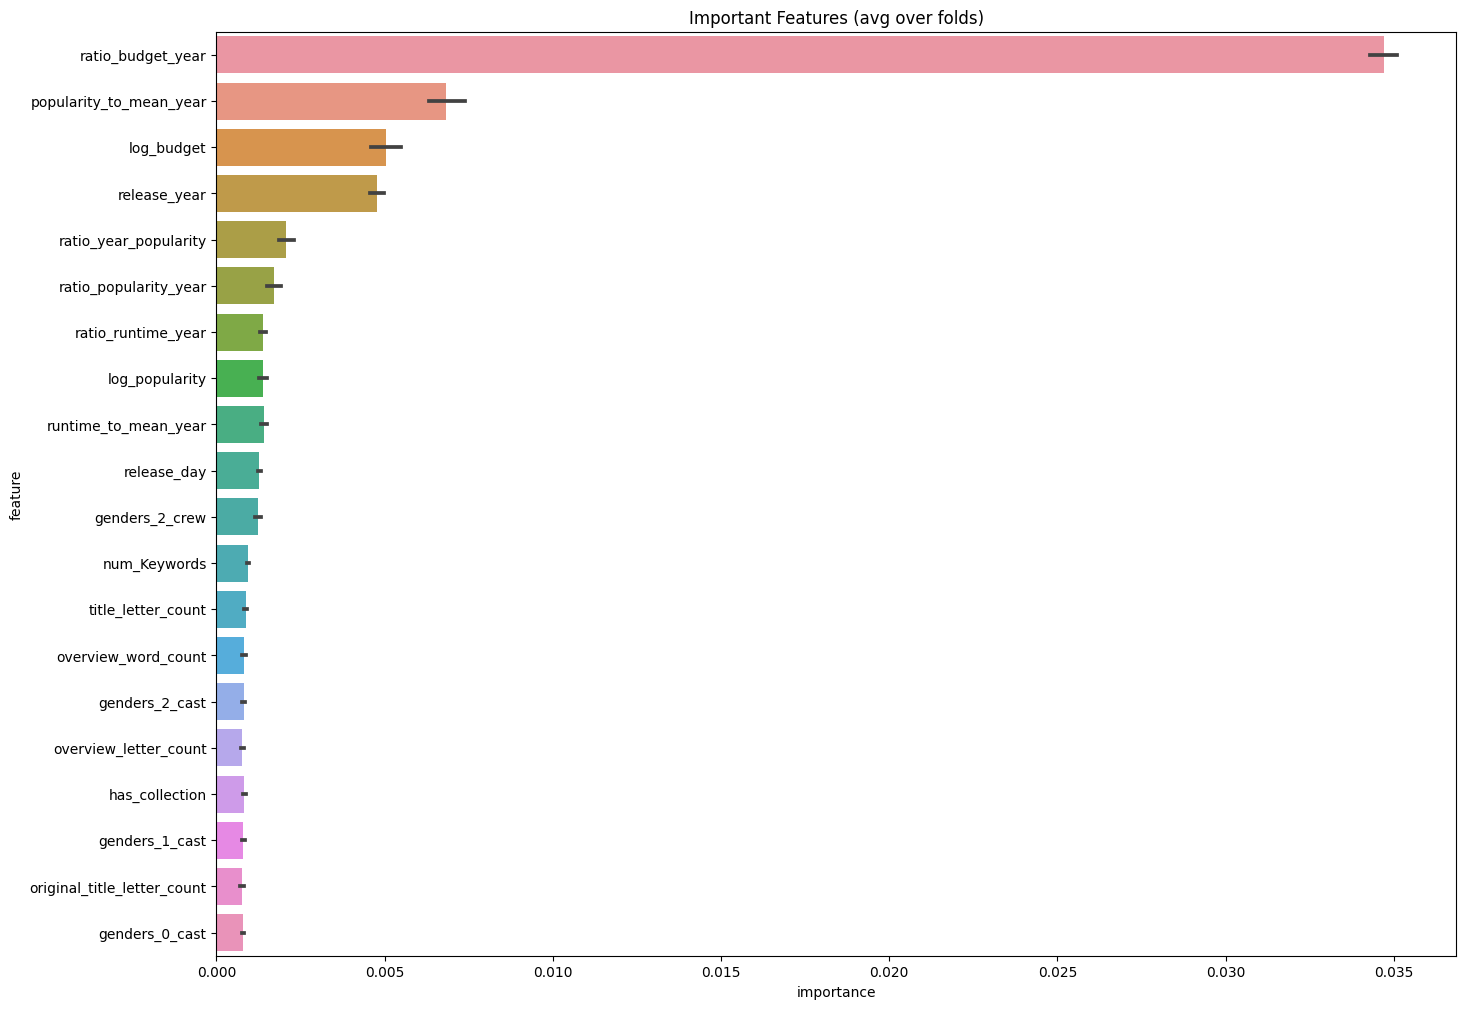

In [54]:
params = {
    'n_estimators': 50,
    'max_depth': 10
}
params = {}
start = time.time()
rf_pred, rf_score = models(X_train, X_valid, y_train, y_valid, test, 'rf', params, plot_feature_importance=True)
end = time.time()
rf_time = (end-start)/60
print('Time elapsed: {0:.2f} m'.format(rf_time))

##### Xgboost

Fold 0 started at Wed May 24 14:26:18 2023
Fold 1 started at Wed May 24 14:28:27 2023
Fold 2 started at Wed May 24 14:31:58 2023
Fold 3 started at Wed May 24 14:34:57 2023
Fold 4 started at Wed May 24 14:38:34 2023
Fold 5 started at Wed May 24 14:41:19 2023
Fold 6 started at Wed May 24 14:43:48 2023
Fold 7 started at Wed May 24 14:45:19 2023
Fold 8 started at Wed May 24 14:46:45 2023
Fold 9 started at Wed May 24 14:51:26 2023
Mean RMSE: 1.89387, std: 0.17945.
Time elapsed: 29.29 m


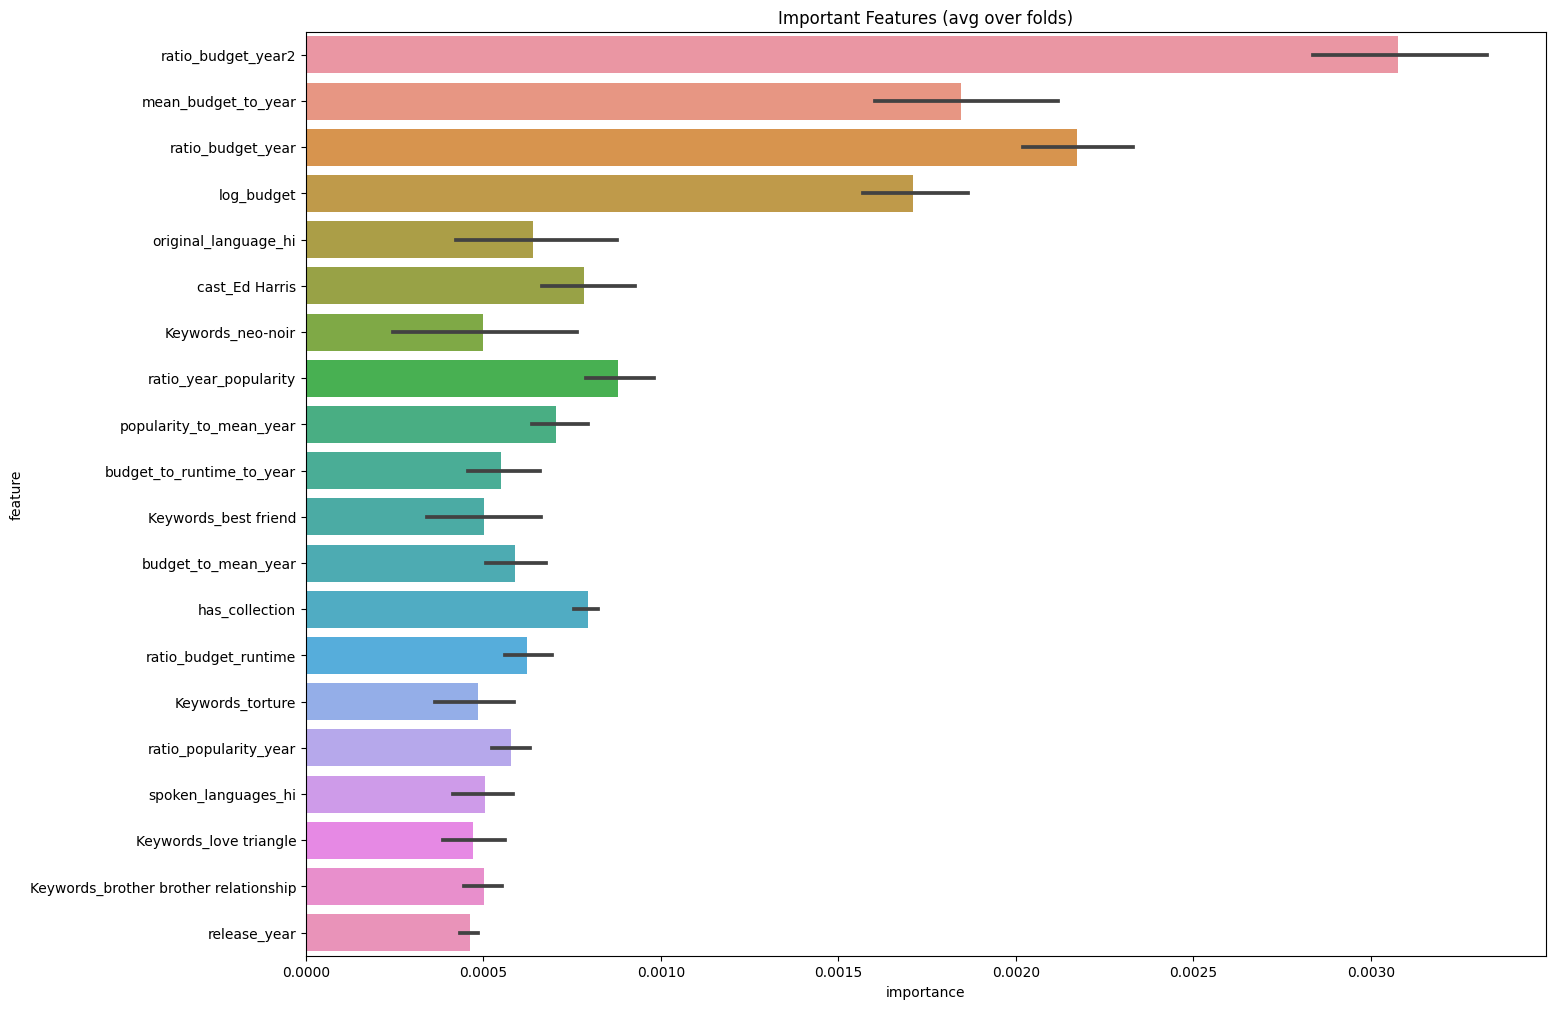

In [55]:
xgb_params = {'objective': 'reg:squarederror',
              'eta': 0.01,
              'max_depth': 5,
              'min_child_weight': 3,
              'subsample': 0.8,
              'colsample_bytree': 0.7,
              'colsample_bylevel': 0.5,
              'eval_metric': 'rmse',
              'seed': 22}
start = time.time()
xgb_pred, xgb_score = models(X_train, X_valid, y_train, y_valid, test, 'xgb', xgb_params, True)
end = time.time()
xgb_time = (end-start)/60
print('Time elapsed: {0:.2f} m'.format(xgb_time))

##### Lightgbm

Fold 0 started at Wed May 24 14:55:36 2023
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
Fold 1 started at Wed May 24 14:55:43 2023
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[Light

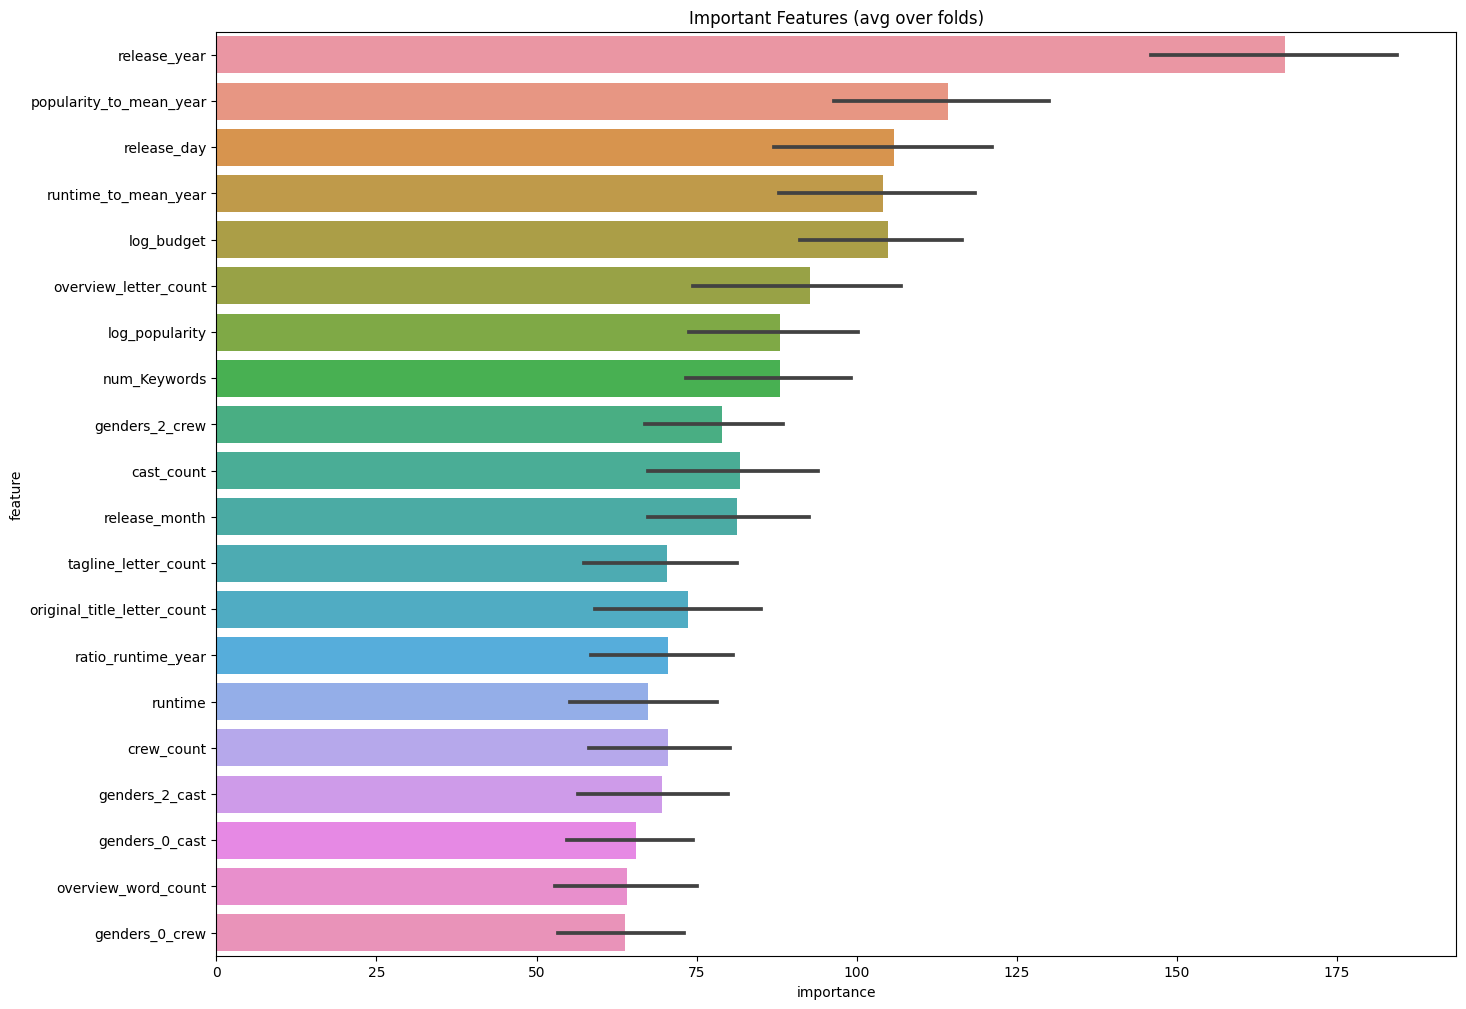

In [56]:
lgb_params = {'objective': 'regression',
              'num_leaves': 40,
              'min_data_in_leaf': 10,
              'max_depth': 7,
              'learning_rate': 0.01,
              'boosting': "gbdt",
              'feature_fraction': 0.9, 
              'bagging_freq': 1, 
              'bagging_fraction': 0.7,
              'bagging_seed': 22,
              'metric': 'rmse',
              'lambda_l1': 0.2,
              'verbosity': -1}
start = time.time()
lgb_pred, lgb_score = models(X_train, X_valid, y_train, y_valid, test, 'lgb', lgb_params, True)
end = time.time()
lgb_time = (end-start)/60
print('Time elapsed: {0:.2f} m'.format(lgb_time))

##### CatBoost

Fold 0 started at Wed May 24 14:56:49 2023
Fold 1 started at Wed May 24 14:57:44 2023
Fold 2 started at Wed May 24 14:58:51 2023
Fold 3 started at Wed May 24 14:59:51 2023
Fold 4 started at Wed May 24 15:01:31 2023
Fold 5 started at Wed May 24 15:02:15 2023
Fold 6 started at Wed May 24 15:03:50 2023
Fold 7 started at Wed May 24 15:04:30 2023
Fold 8 started at Wed May 24 15:05:09 2023
Fold 9 started at Wed May 24 15:06:11 2023
Mean RMSE: 1.85912, std: 0.17281.
Time elapsed: 10.98 m


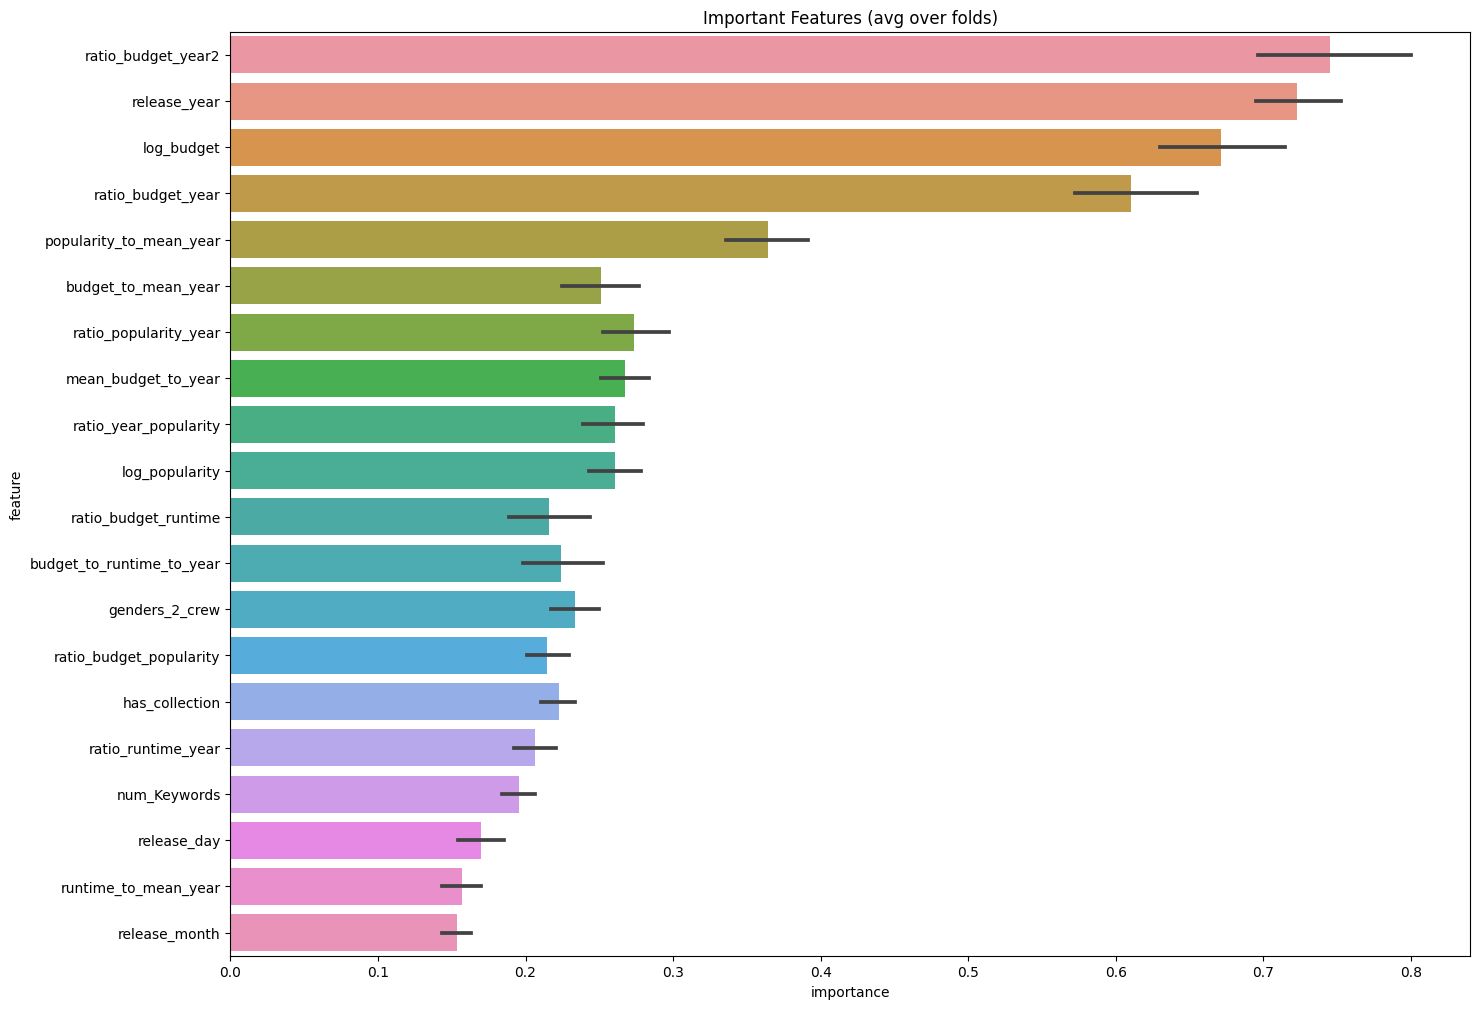

In [57]:
cat_params = {'learning_rate': 0.01,
              'depth': 7,
              'colsample_bylevel': 0.7,
              'bagging_temperature': 0.2,
              'l2_leaf_reg': 1,
              'random_seed': 22,
              'allow_writing_files': False,
              'early_stopping_rounds': 200
             }
start = time.time()
cat_pred, cat_score = models(X_train, X_valid, y_train, y_valid, test, 'cat', cat_params, True)
end = time.time()
cat_time = (end-start)/60
print('Time elapsed: {0:.2f} m'.format(cat_time))

##### Đánh giá kết quả
- Nhận xét:
  - Cả 5 thuật toán đều mô hình hóa thành công dữ liệu.
  - Từ biểu đồ cho thấy các thuộc tính `ratio_budget_year`, `log_budget`, `release_year`, `popularity_to_mean_year` là những yếu tố cực kỳ quan trọng khi xuất hiện trong 3 trên 4 mô hình.
  - Mô hình đưa ra độ đo hiệu quả là: `Random Forest`, `Xgboost`, `Lightgbm`, `CatBoost` trong đó hiệu quả nhất là `CatBoost`, tuy nhiên chênh lệch là không đáng kể.
  - Thời gian chạy mô hình nhanh nhất là `Linear Regression`, mất chưa tới 1 phút để đưa ra kết quả, tuy nhiên kết quả cho ra lại là kết quả tệ nhất, chứng tỏ mô hình `Linear Regression` không phù hợp với bài toán này.

In [58]:
models = []
models.append("Linear Regression")
models.append("Random Forest")
models.append("Xgboost")
models.append("Lightgbm")
models.append("CatBoost")

scores = []
scores.append(np.mean(lr_score))
scores.append(np.mean(rf_score))
scores.append(np.mean(xgb_score))
scores.append(np.mean(lgb_score))
scores.append(np.mean(cat_score))

times = []
times.append(lr_time)
times.append(rf_time)
times.append(xgb_time)
times.append(lgb_time)
times.append(cat_time)


models_df = pd.DataFrame()
models_df["models"] = models
models_df["scores"] = scores
models_df["times"] =  times
models_df

,models,scores,times
0,Linear Regression,6.649109,0.232247
1,Random Forest,2.064395,3.803606
2,Xgboost,1.893873,29.288721
3,Lightgbm,1.894911,1.204299
4,CatBoost,1.859120,10.978854


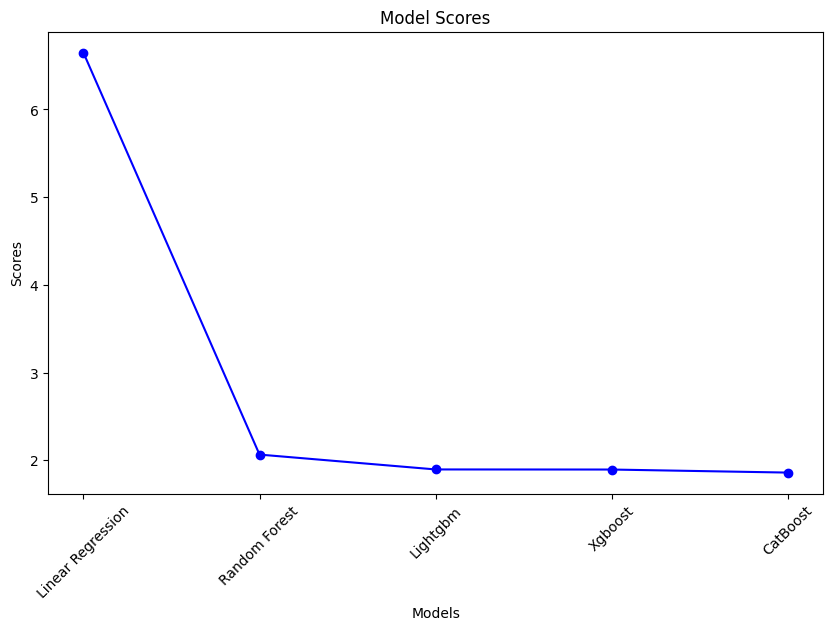

In [59]:
sc_models_df = models_df.sort_values(by='scores', ascending=False)

plt.figure(figsize=(10,6))
plt.plot(sc_models_df["models"], sc_models_df["scores"], marker='o', linestyle='-', color='blue')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Scores')

plt.xticks(rotation=45)
#plt.savefig('fig1.png', bbox_inches='tight')
plt.show()

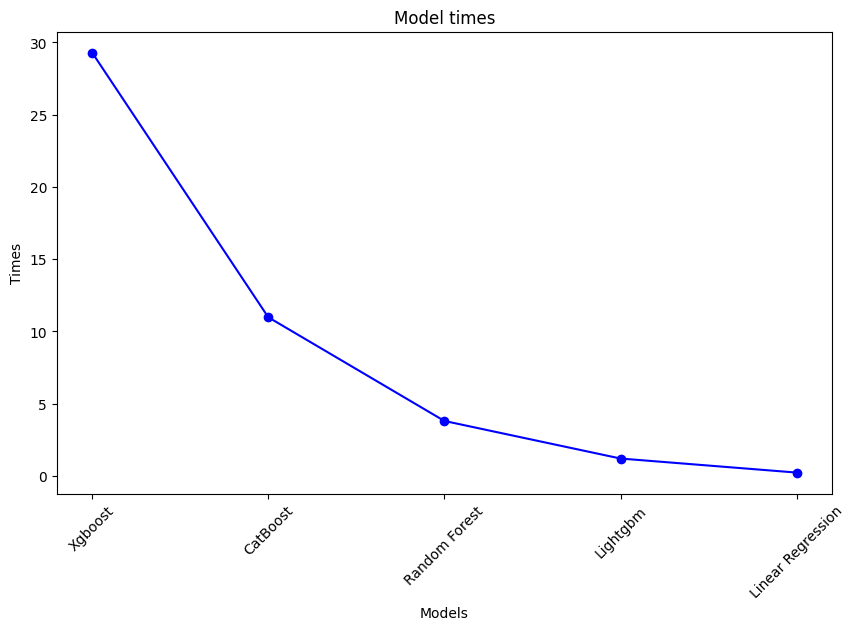

In [60]:
time_models_df = models_df.sort_values(by='times', ascending=False)

plt.figure(figsize=(10,6))
plt.plot(time_models_df["models"], time_models_df["times"], marker='o', linestyle='-', color='blue')

plt.xlabel('Models')
plt.ylabel('Times')
plt.title('Model times')

plt.xticks(rotation=45)
#plt.savefig('fig1.png', bbox_inches='tight')
plt.show()

In [61]:
sub = pd.read_csv('sample_submission.csv')
df_sub = pd.DataFrame()
df_sub['id'] = sub['id']
df_sub['revenue'] = np.expm1(cat_pred)
df_sub.to_csv("submission.csv", index=False)